In [1]:
# Not in the right coordinates frame

In [1]:
import numpy as np
import astropy as ast
import scipy as sc
import matplotlib.pyplot as plt

import numpy as np
import math
import astropy
import numpy.linalg

In [2]:
dir = '/data/vxtest/514d'

filename =  dir+'/snapshot_1330'
haloname = dir+'/h1330.z0.000.AHF_halos'

In [3]:
dh = np.loadtxt(haloname)
xh = dh[:,5]
yh = dh[:,6]
zh = dh[:,7]
vxh = dh[:,8]
vyh = dh[:,9]
vzh = dh[:,10]

print(xh[0],yh[0],zh[0],vxh[0],vyh[0],vzh[0])

hd = np.fromfile(filename,dtype='int32',count=7)
nd = hd[2]
ns = hd[5]
nc = hd[3]
head = np.fromfile(filename,dtype='double',count=7,offset=4+6*4)
time=head[6]
print(time,nd,ns,nc)

start_d = 0
start_c = nd
start_s = nd + nc
block = nd + nc + ns

skipx = 256 + 3*4 + start_c*3*8
skipv = 256 + 5*4 + (block*3 + start_c*3)*8
skipi = 256 + 7*4 + block*3*2*8 + start_c*4
rc = np.fromfile(filename,dtype='double',count=3*nc,offset=skipx)
vc = np.fromfile(filename,dtype='double',count=3*nc,offset=skipv)

idc = np.fromfile(filename,dtype='uint32',count=nc,offset=skipi)
jxc = rc[0::3] - xh[0]
jyc = rc[1::3] - yh[0]
jzc = rc[2::3] - zh[0]

jvxc = vc[0::3] - vxh[0]
jvyc = vc[1::3] - vyh[0]
jvzc = vc[2::3] - vzh[0]

idc -= nd
ki = np.zeros(nc,dtype='int32')

for j in range(nc):
    ix = idc[j]
    ki[ix] = j

xc = jxc[ki]
yc = jyc[ki]
zc = jzc[ki]

vxc = jvxc[ki]
vyc = jvyc[ki]
vzc = jvzc[ki]

skipx = 256 + 3*4 + start_s*3*8
skipv = 256 + 5*4 + block*3*8 + start_s*3*8 #skip over r, and dm+c v's
skipi = 256 + 7*4 + block*3*2*8 + start_s*4 #skip over r and v and dm+c id
skipc = 256 + 9*4 + block*(2*3*8+4) + start_s*4 #skip over r, v and id and dm+c ic

rs = np.fromfile(filename,dtype='double',count=3*ns,offset=skipx)
vs = np.fromfile(filename,dtype='double',count=3*ns,offset=skipv)
ics = np.fromfile(filename,dtype='uint32',count=ns,offset=skipc)

xs = rs[0::3] - xh[0]
ys = rs[1::3] - yh[0]
zs = rs[2::3] - zh[0]
vxs = vs[0::3] - vxh[0]
vys = vs[1::3] - vyh[0]
vzs = vs[2::3] - vzh[0]

-135.83711305 342.85332493 569.47096079 -17.22 33.04 43.31
14.099999996515194 70514272 10454433 64


In [4]:
cluster = 37
select = (ics == cluster)

print(xs[select])
print(xc[cluster],yc[cluster],zc[cluster])

[-48.10163267 -42.36662769 -44.67480587 ...  24.66195171  24.66274439
  24.66289893]
24.650177228499146 12.842420562883603 10.115084620141602


In [5]:
# Rename (x,y,z) and (vx,vy,vz) of the star cluster

cluster_x = xc[cluster]
cluster_y = yc[cluster]
cluster_z = zc[cluster]
cluster_r = [cluster_x, cluster_y, cluster_z]

cluster_vx = vxc[cluster]
cluster_vy = vyc[cluster]
cluster_vz = vzc[cluster]
cluster_v = [cluster_vx, cluster_vy, cluster_vz]

# Two methods to get L_z

# Third component returned by np.cross
cluster_L = np.cross(cluster_r, cluster_v)
cluster_Lx = cluster_L[0]
cluster_Ly = cluster_L[1]
cluster_Lz = cluster_L[2]

# Doing: r_x p_y - r_y p_x
cluster_Lz_2 = cluster_x * cluster_vy - cluster_y * cluster_vx

In [6]:
# Rename (x,y,z) and (vx,vy,vz) of all stars in the cluster

stars_x = xs[select]
stars_y = ys[select]
stars_z = zs[select]

stars_vx = vxs[select]
stars_vy = vys[select]
stars_vz = vzs[select]

In [7]:
# Fill arrays of stars' (Lx, Ly, Lz)

stars_Lx = []
stars_Ly = []
stars_Lz = []

for i in range(len(stars_x)):
    
    star_x = stars_x[i]
    star_y = stars_y[i]
    star_z = stars_z[i]
    star_r = [star_x, star_y, star_z]
    
    star_vx = stars_vx[i]
    star_vy = stars_vy[i]
    star_vz = stars_vz[i]
    star_v = [star_vx, star_vy, star_vz]
    
    star_L = np.cross(star_r, star_v)
    
    stars_Lx.append(star_L[0])
    stars_Ly.append(star_L[1])
    stars_Lz.append(star_L[2])

In [8]:
# Turn lists into arrays

stars_Lx = np.array(stars_Lx)
stars_Ly = np.array(stars_Ly)
stars_Lz = np.array(stars_Lz)

In [9]:
# Define difference in (Lx, Ly, Lz) wrt cluster centre

stars_delta_Lx = stars_Lx - cluster_Lx
stars_delta_Ly = stars_Ly - cluster_Ly
stars_delta_Lz = stars_Lz - cluster_Lz

In [10]:
stars_L_perp = np.sqrt((stars_delta_Lx) ** 2 + (stars_delta_Ly) ** 2)

In [11]:
stars_longitudes = np.arctan2(stars_y, stars_x)

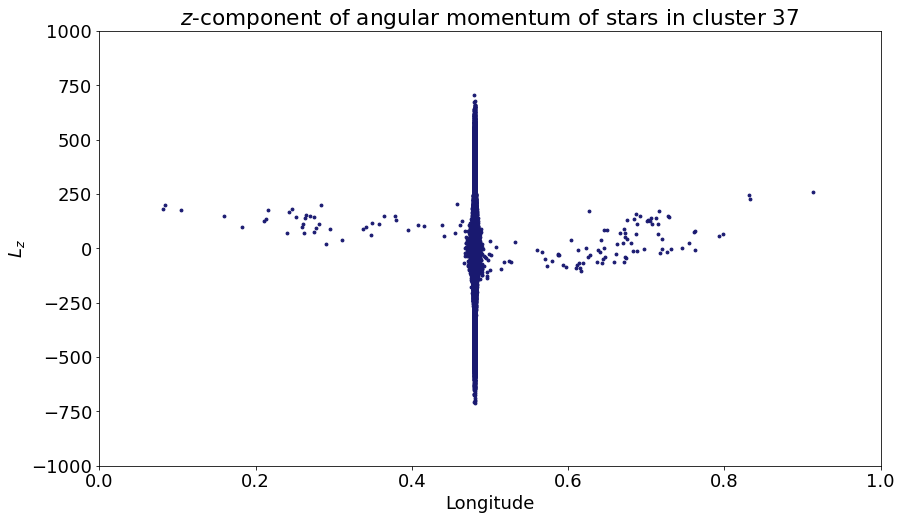

In [14]:
plt.figure(figsize=(14, 8))
plt.rc('font', size=18)

plt.scatter(stars_longitudes, stars_delta_Lz, s=8, c='midnightblue')

plt.xlim(0.3, 0)
plt.ylim(-1000, 1000)

plt.xlabel('Longitude')
plt.ylabel(r'$L_z$')
plt.title(r'$z$-component of angular momentum of stars in cluster ' + str(cluster))

plt.show()

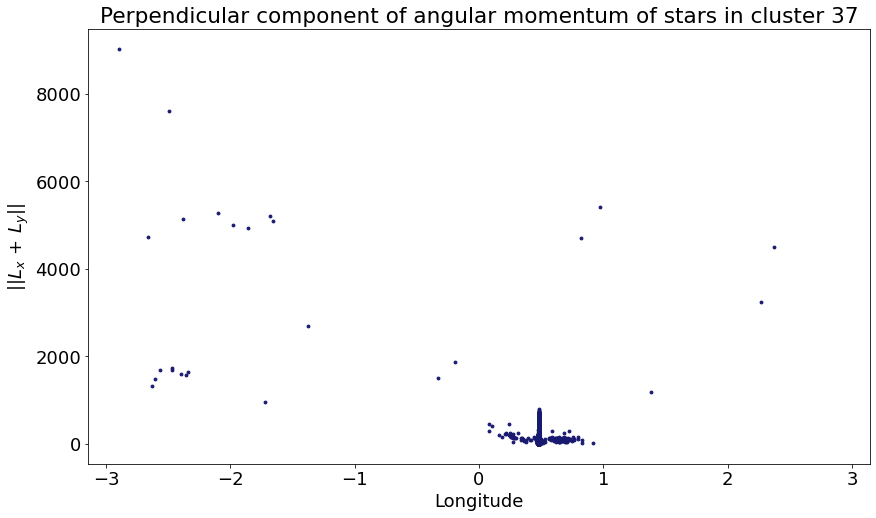

In [32]:
plt.figure(figsize=(14, 8))
plt.rc('font', size=18)

plt.scatter(stars_longitudes, stars_L_perp, s=8, c='midnightblue')

plt.xlim(-np.pi, np.pi)

plt.xlabel('Longitude')
plt.ylabel(r'$|| L_x \, + \, L_y ||$')
plt.title('Perpendicular component of angular momentum of stars in cluster ' + str(cluster))

plt.show()

In [45]:
# plt.figure(figsize=(15, 5))
# plt.rc('font', size=14)

# plt.subplot(1,2,2)
# plt.scatter(stars_longitudes, stars_L_perp, s=8, c='midnightblue')

# plt.xlim(-np.pi, np.pi)
# plt.xlabel('Longitude')
# plt.ylabel(r'$|| L_x \, + \, L_y ||$')
# plt.title('Perpendicular component of angular momentum')


# plt.subplot(1,2,1)
# plt.scatter(stars_longitudes, stars_delta_Lz, s=8, c='midnightblue')

# plt.xlim(-np.pi, np.pi)
# plt.xlabel('Longitude')
# plt.ylabel(r'$L_z$')
# plt.title(r'$z$-component of angular momentum')

# plt.suptitle('Stars of cluster ' + str(cluster))
# plt.show()

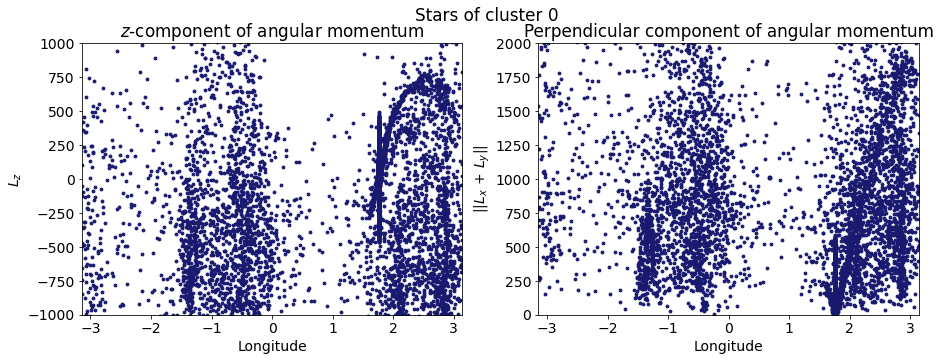

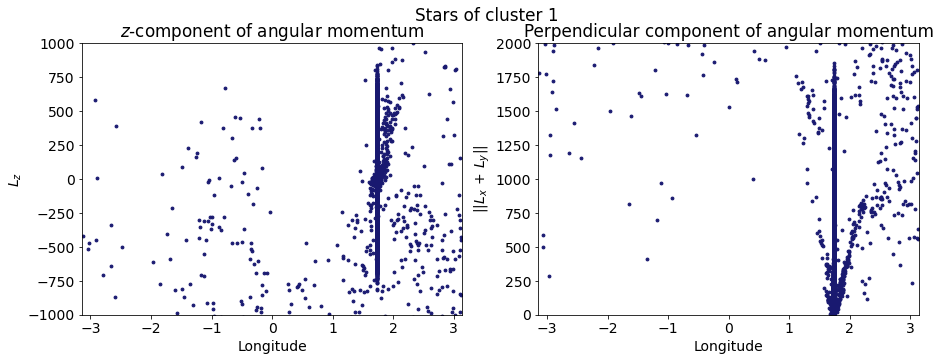

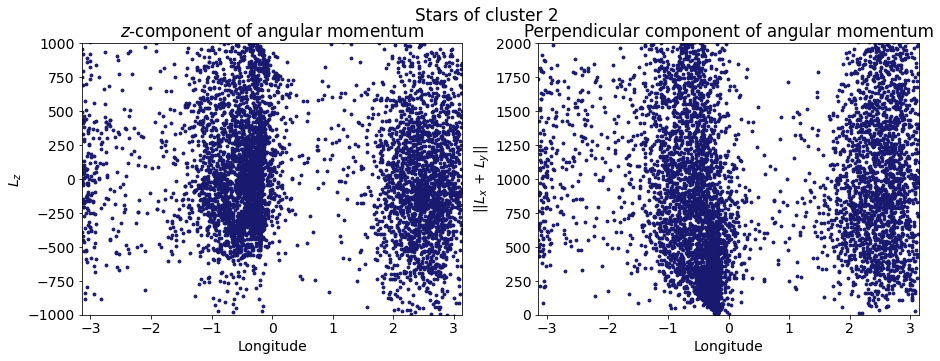

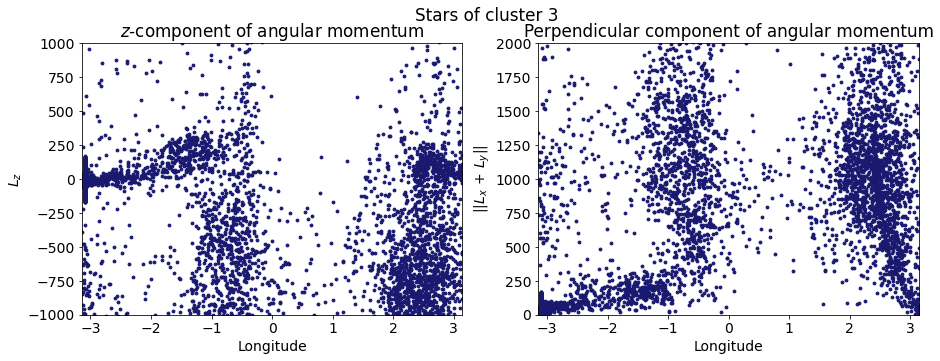

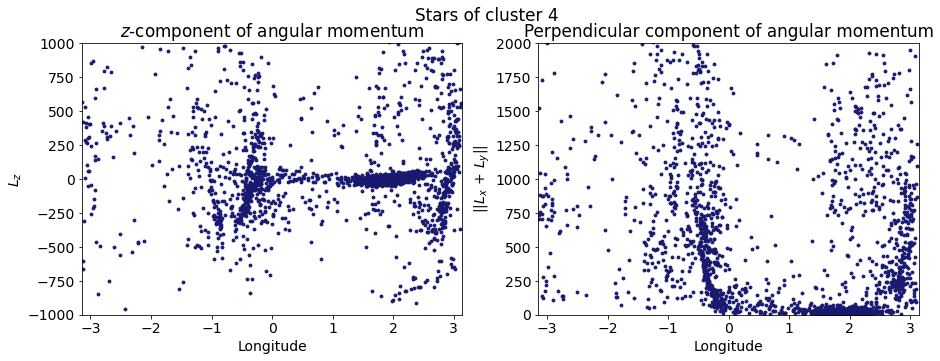

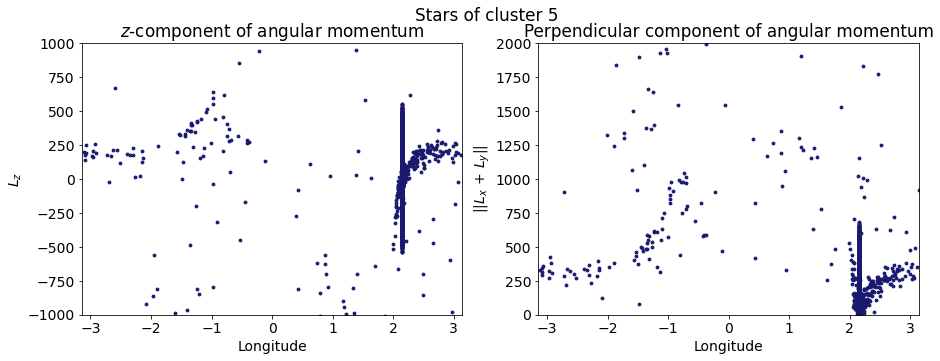

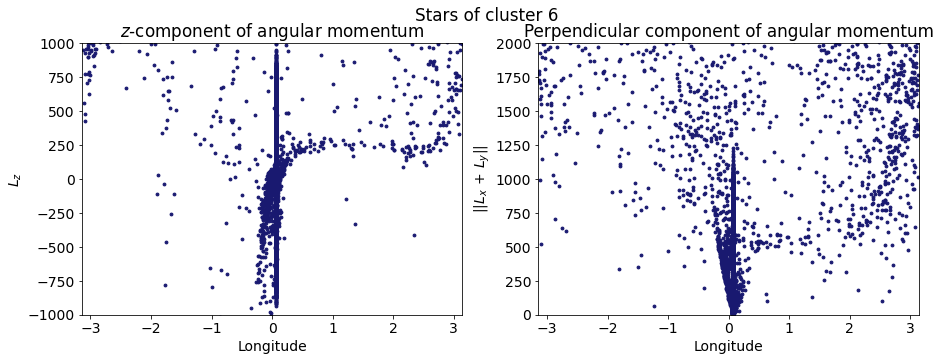

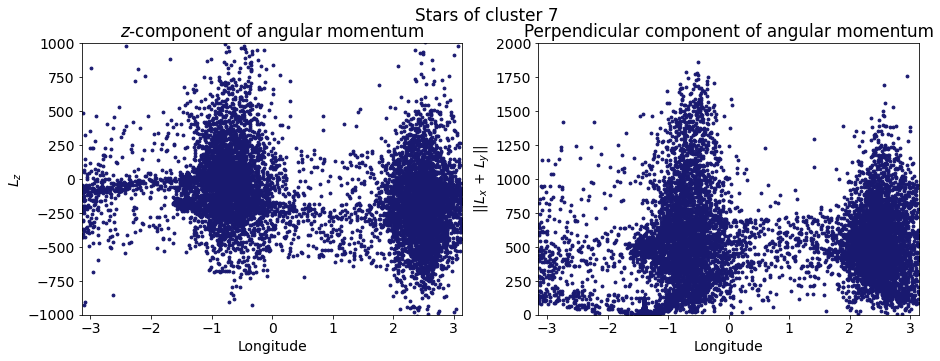

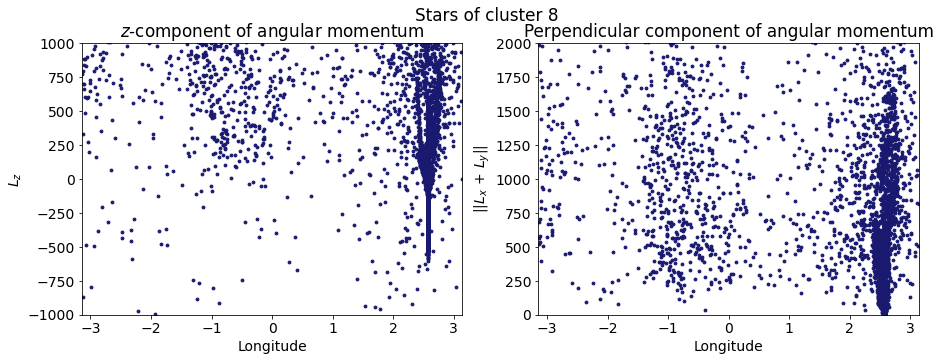

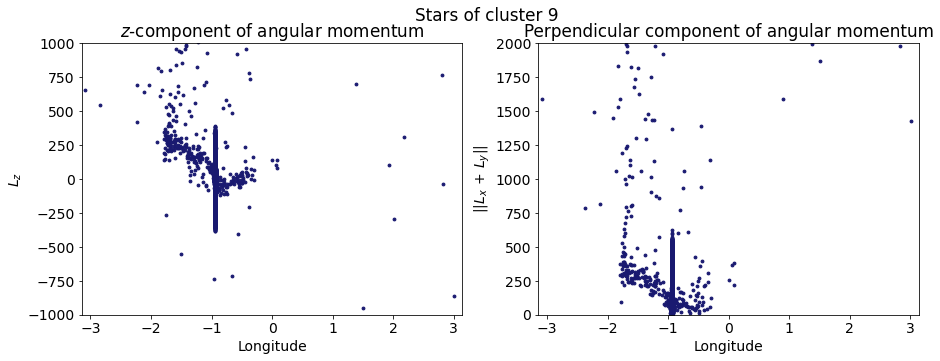

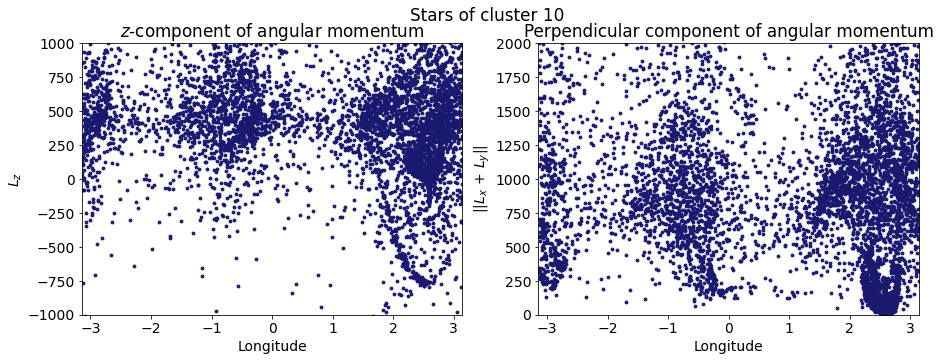

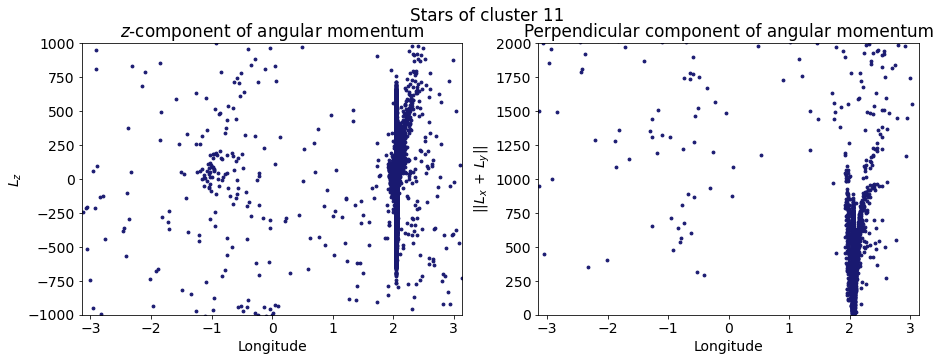

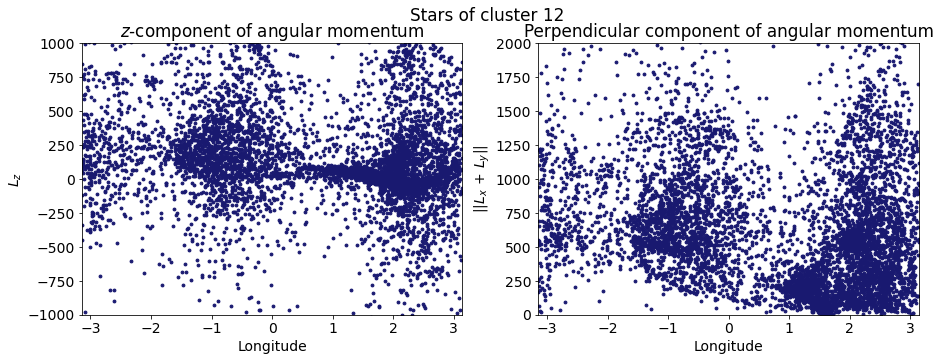

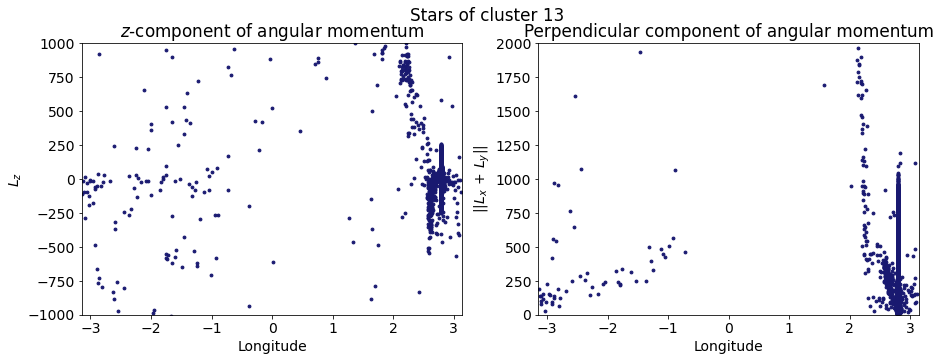

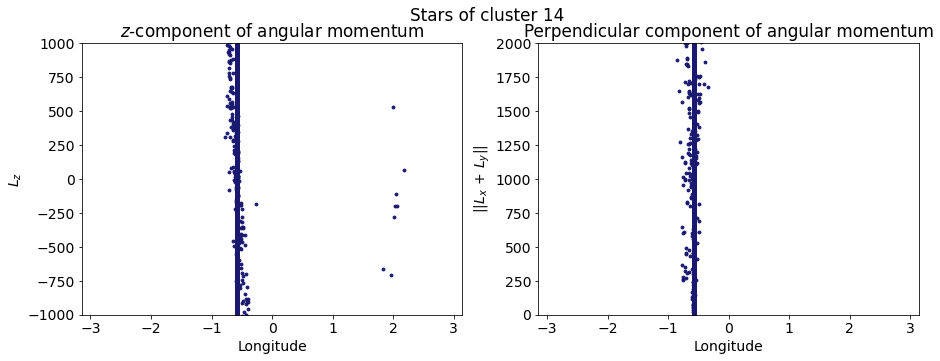

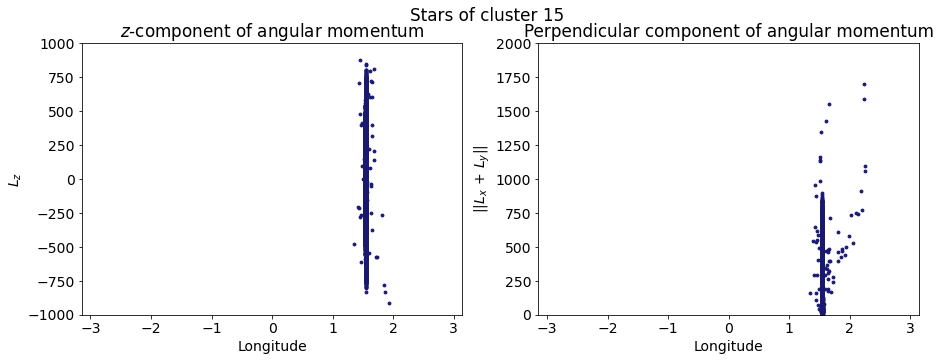

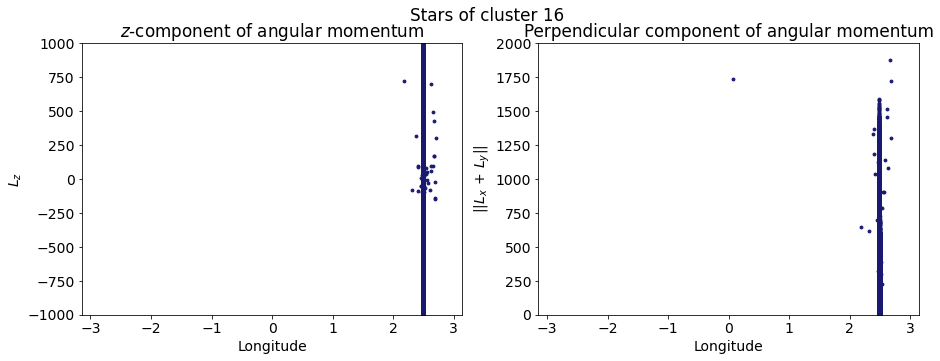

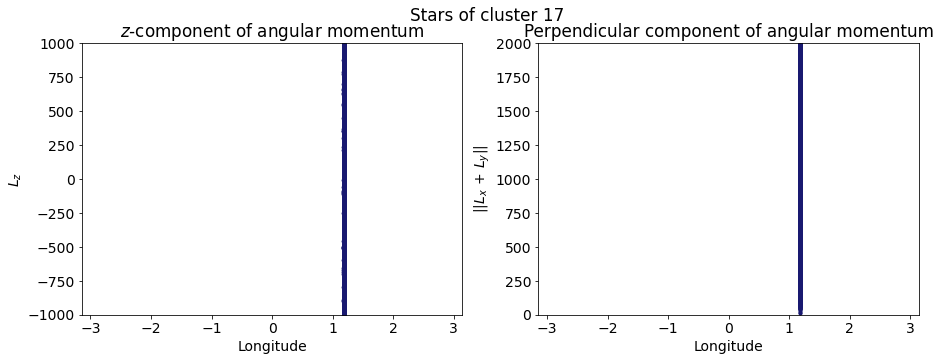

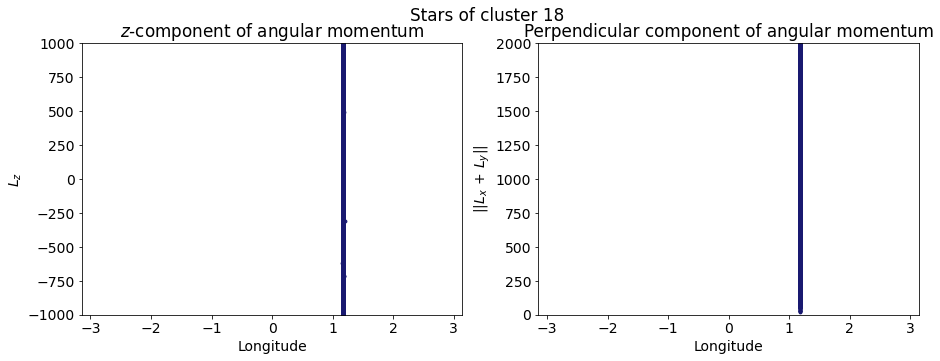

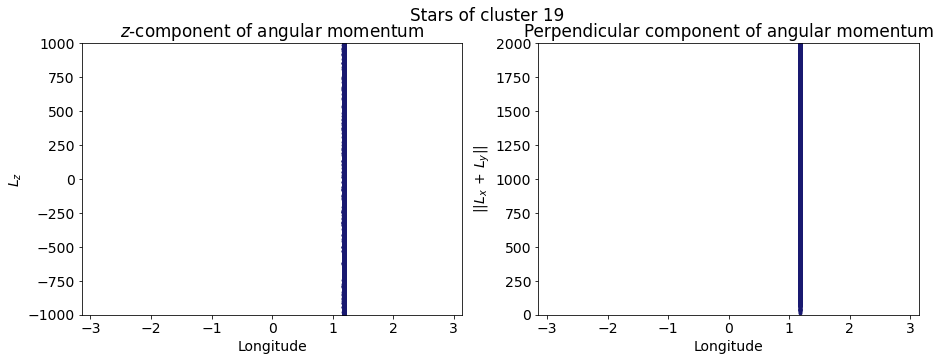

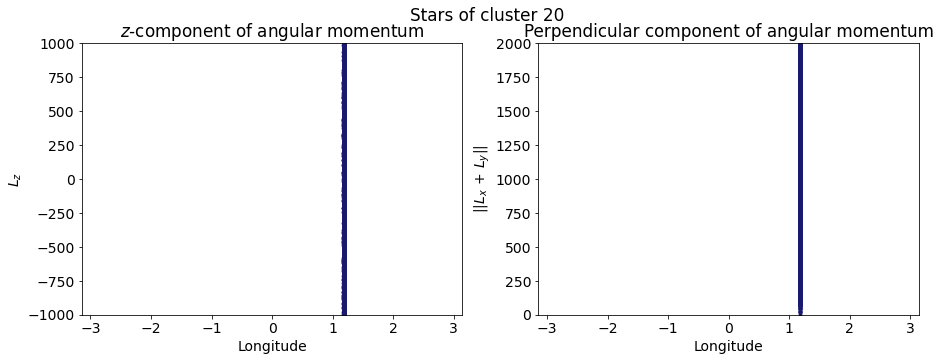

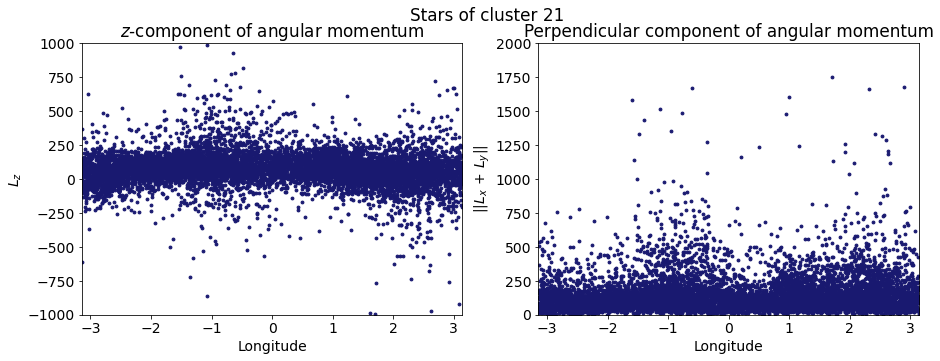

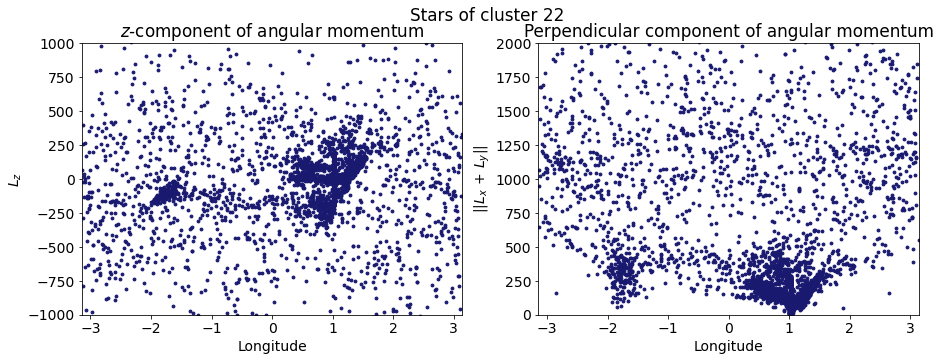

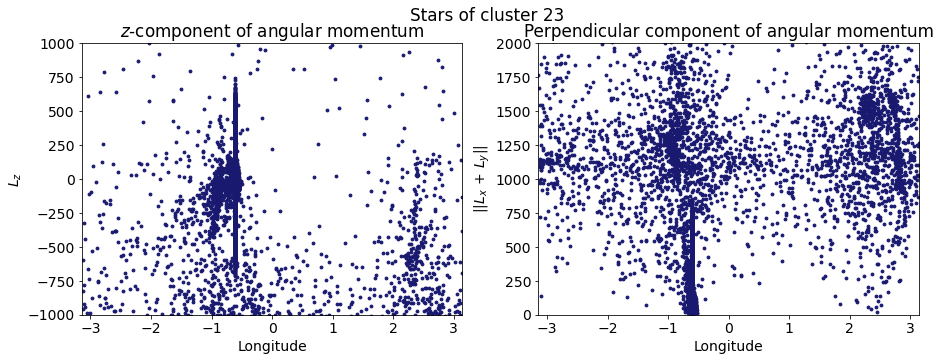

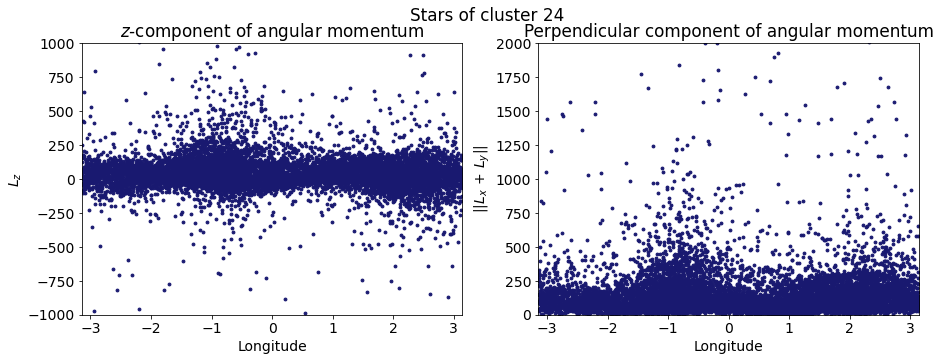

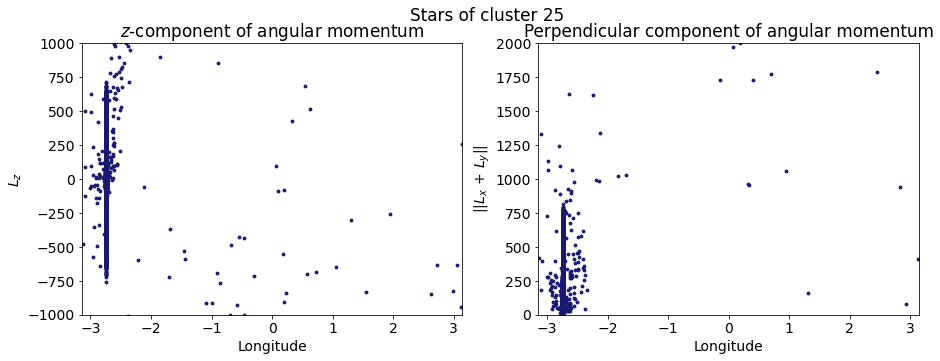

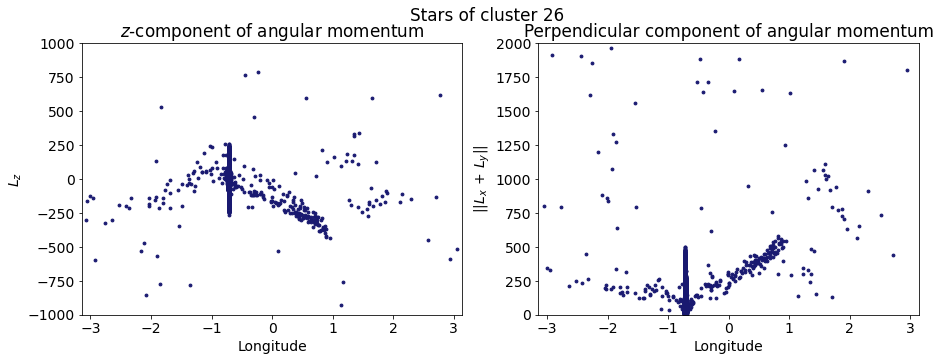

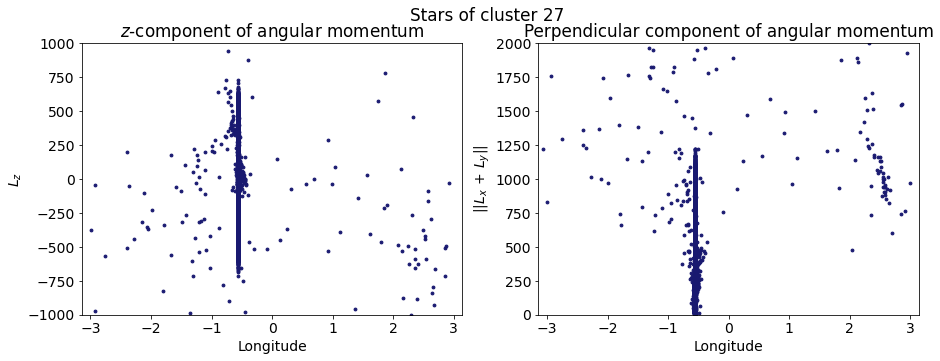

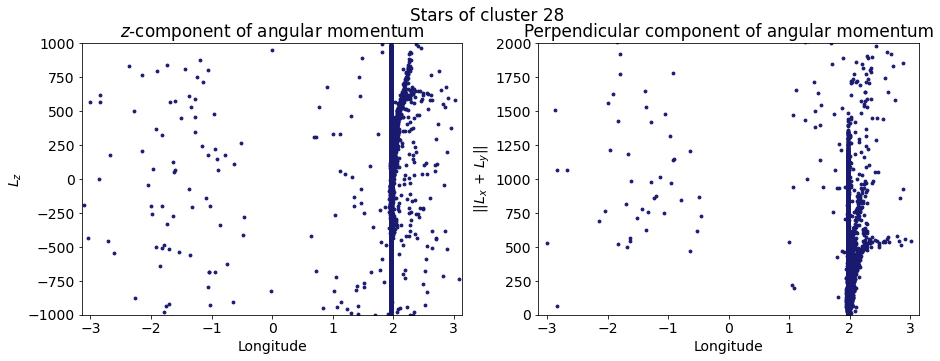

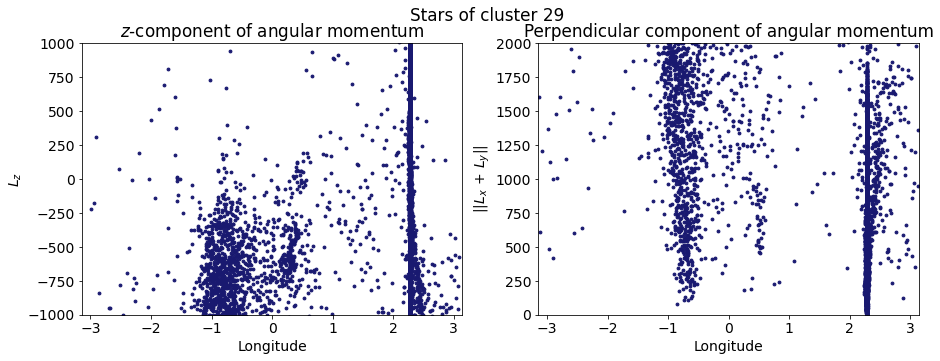

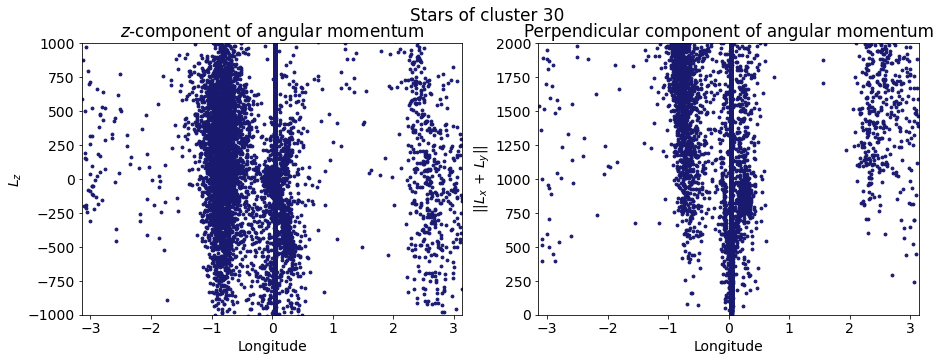

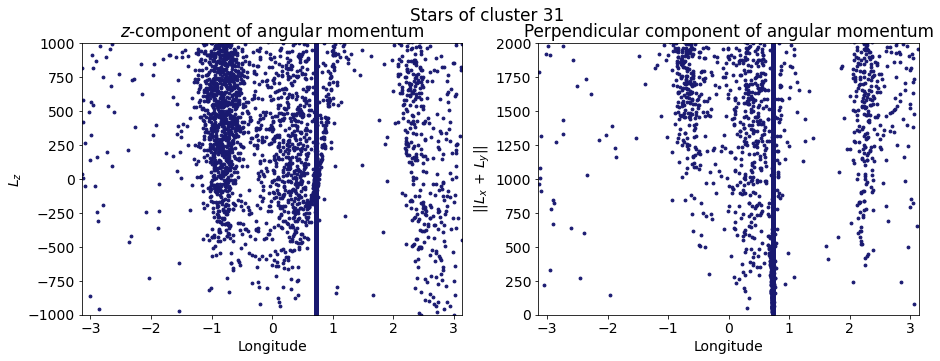

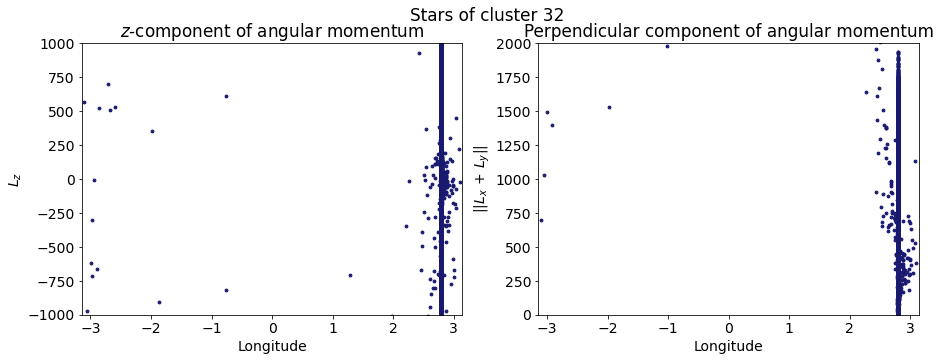

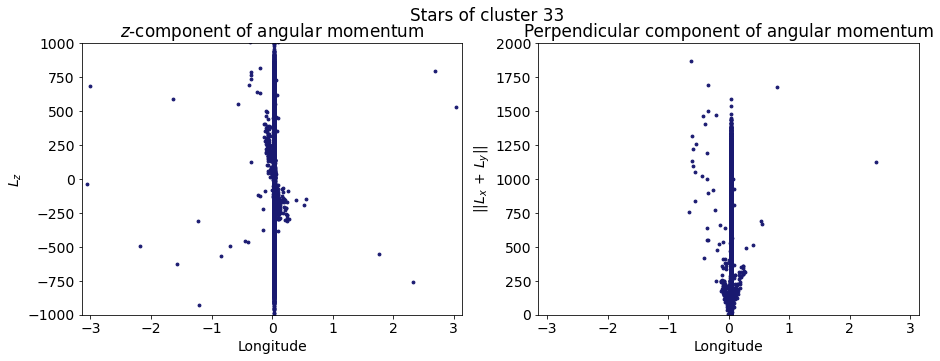

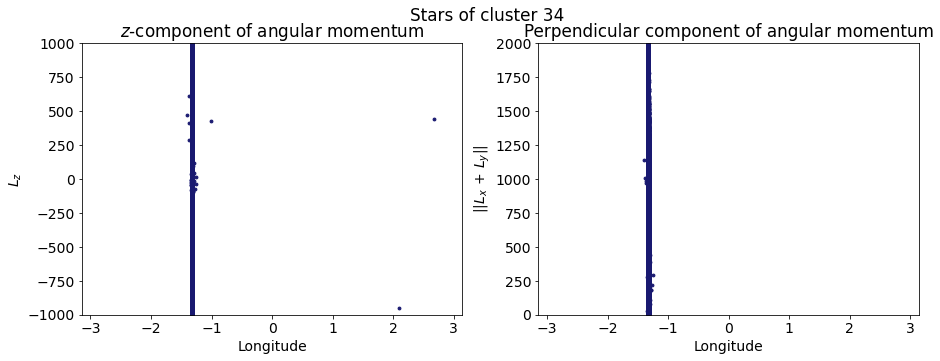

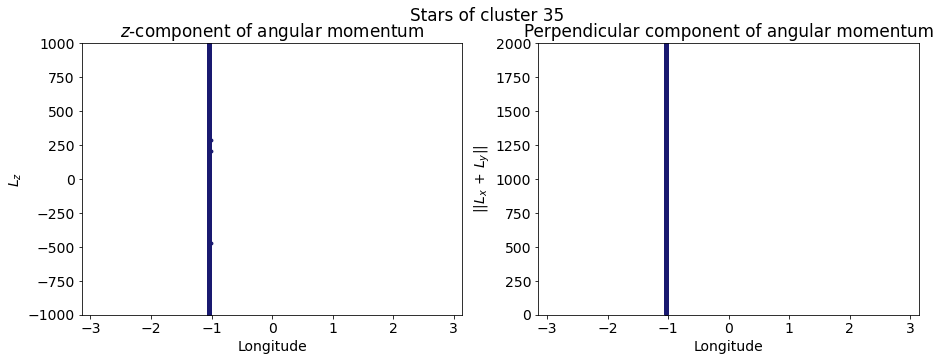

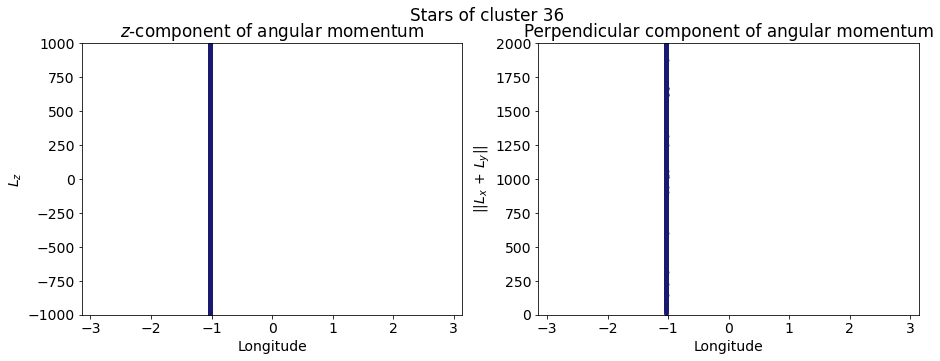

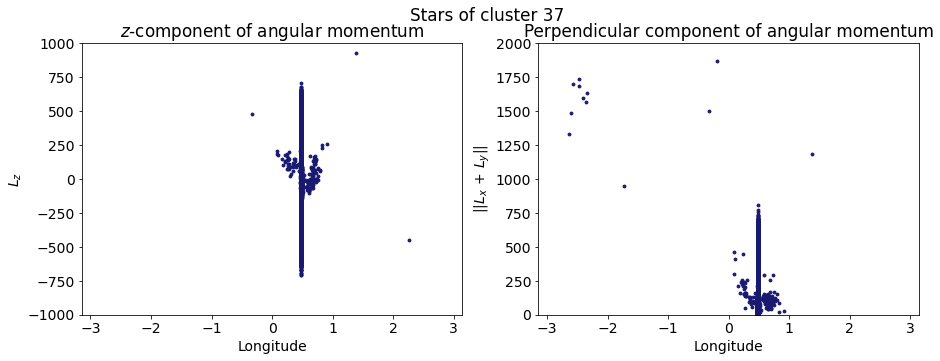

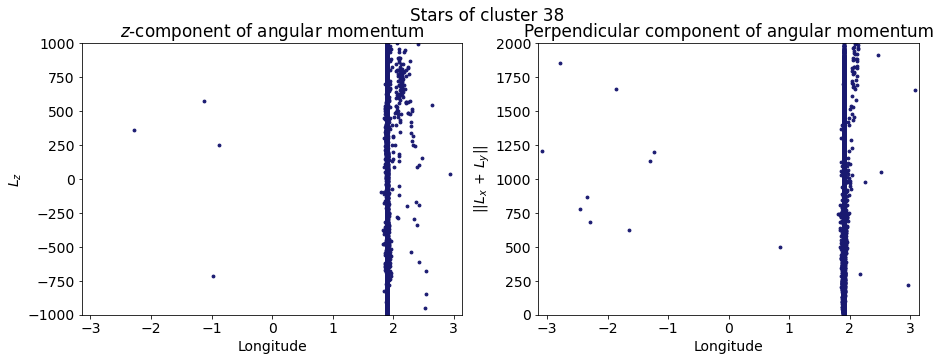

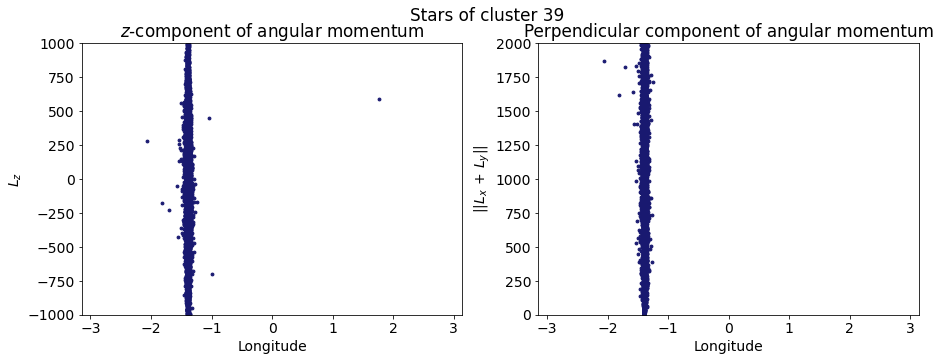

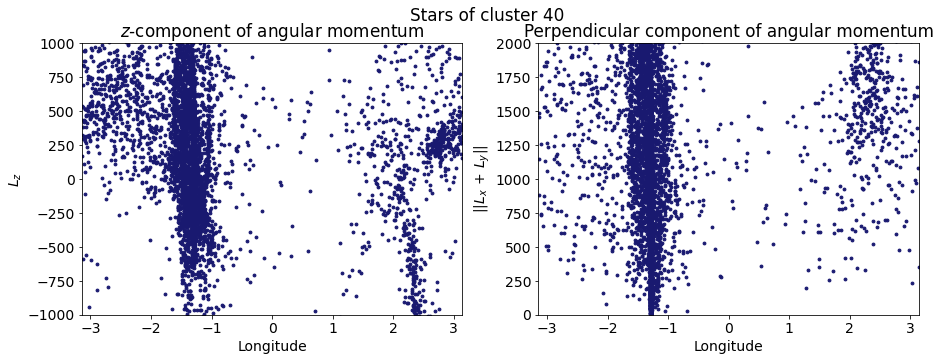

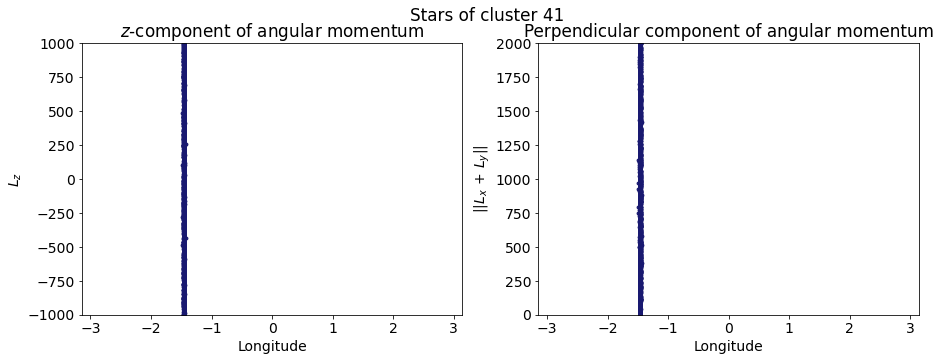

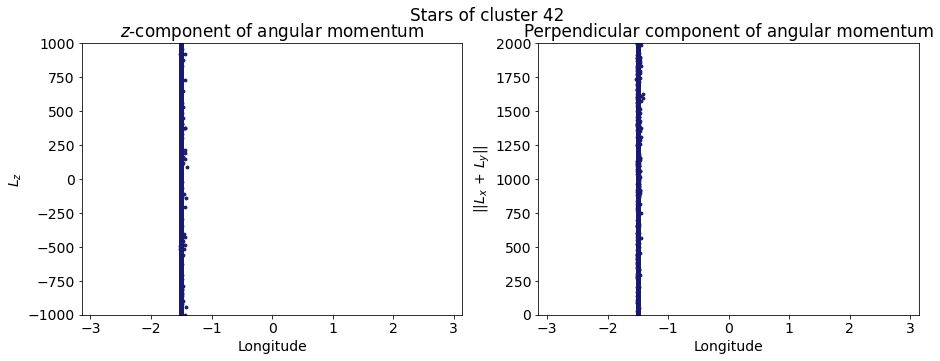

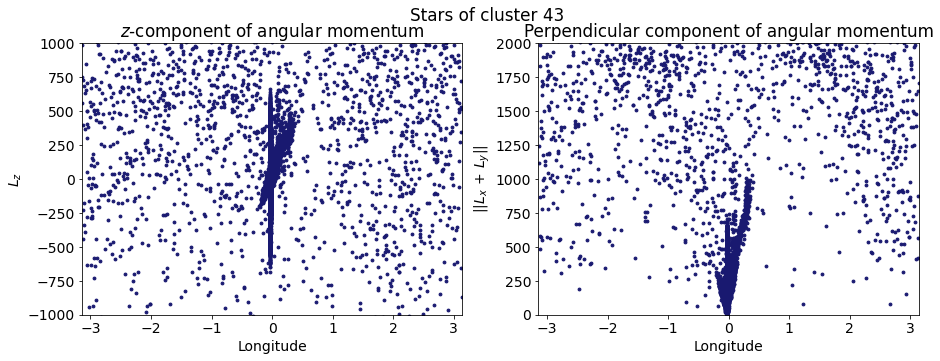

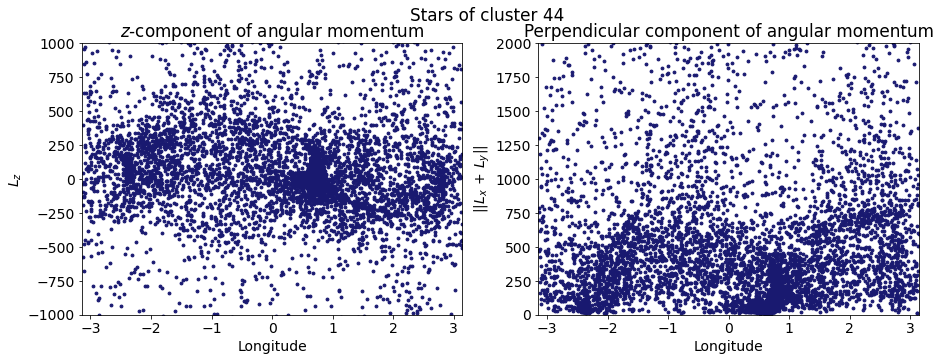

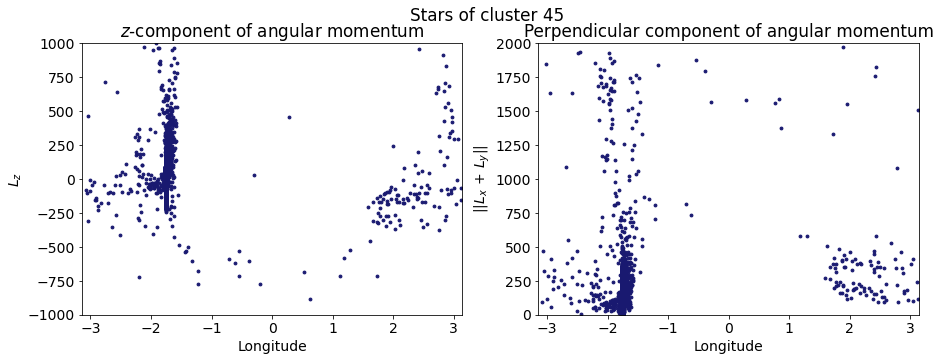

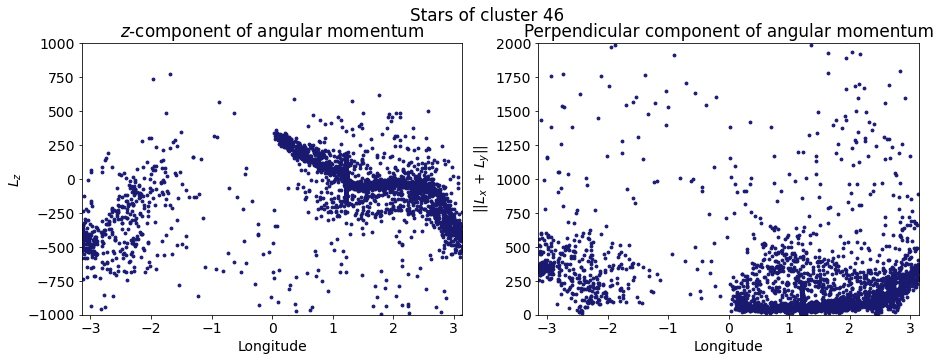

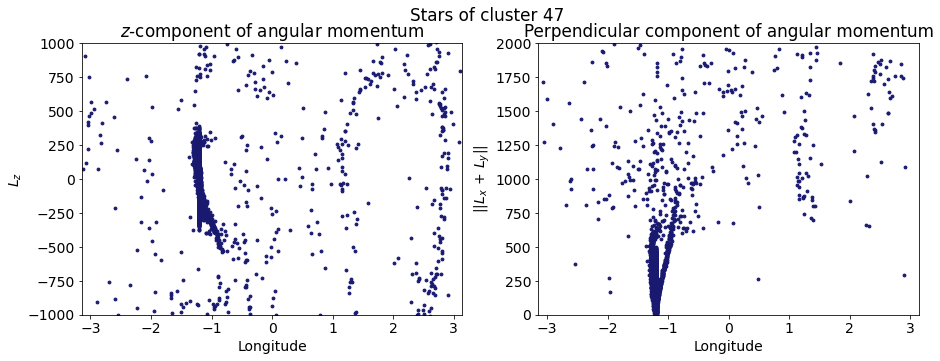

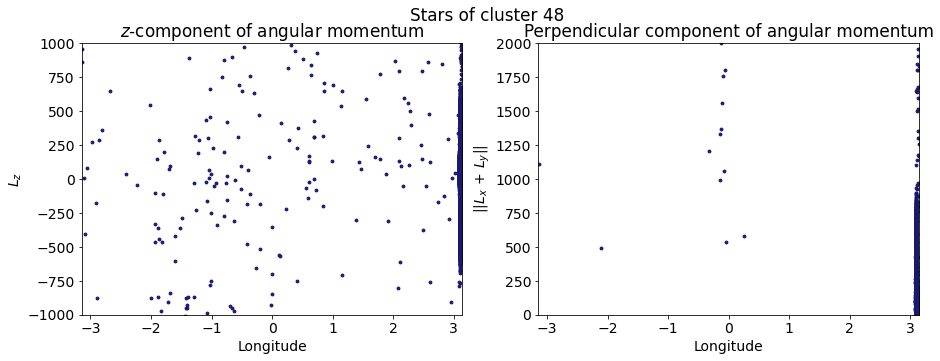

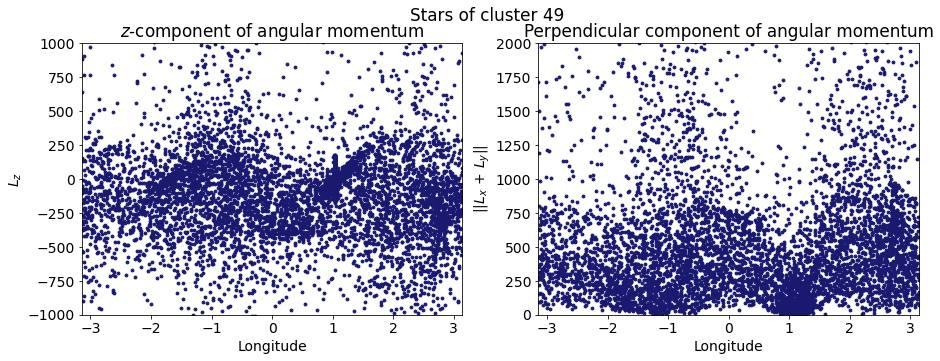

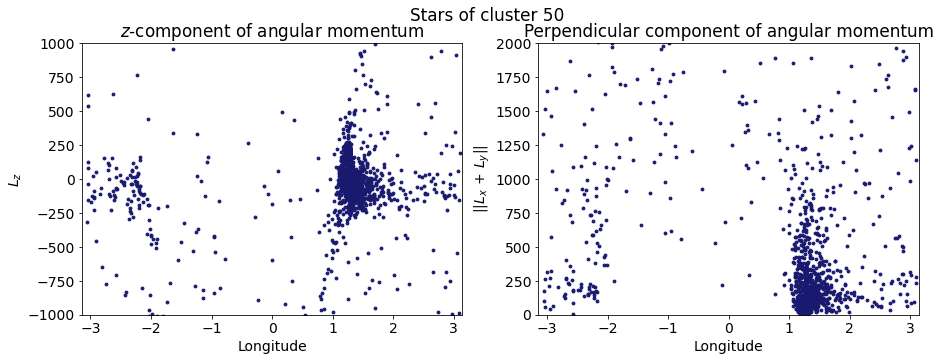

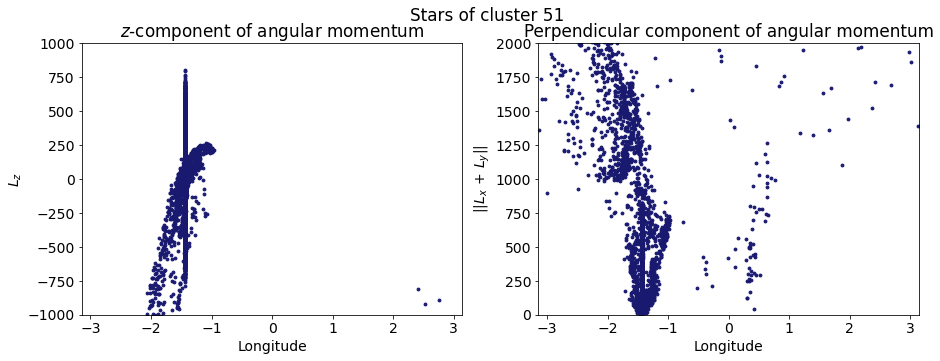

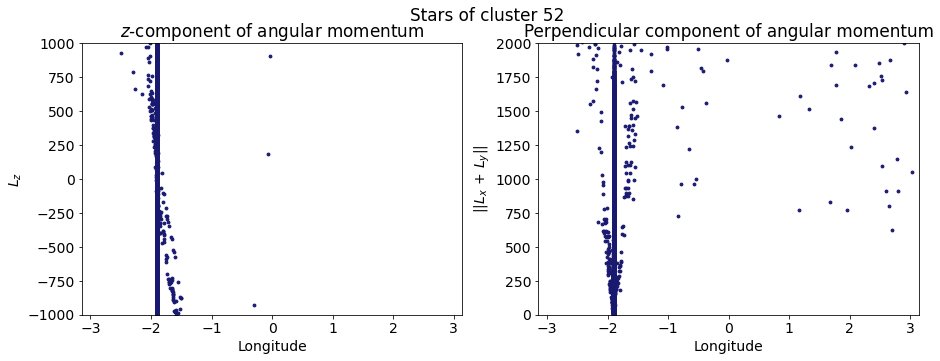

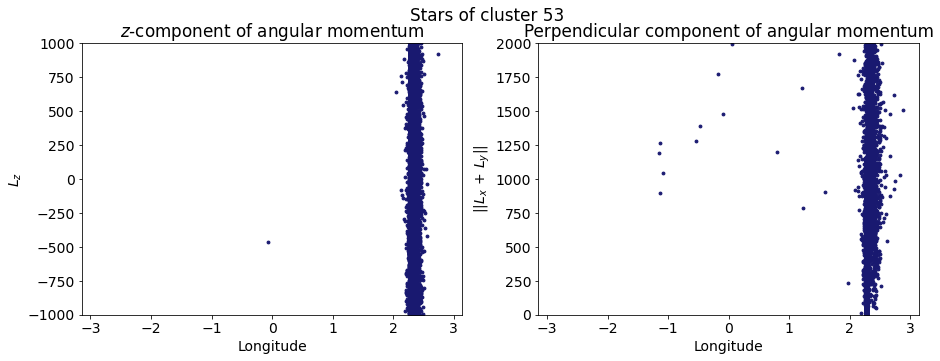

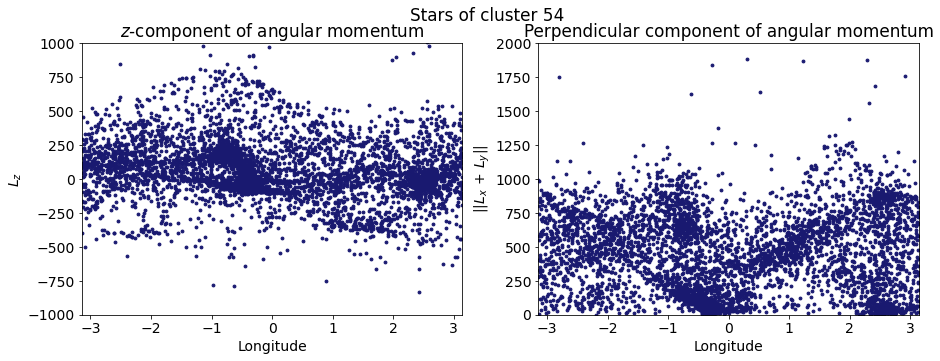

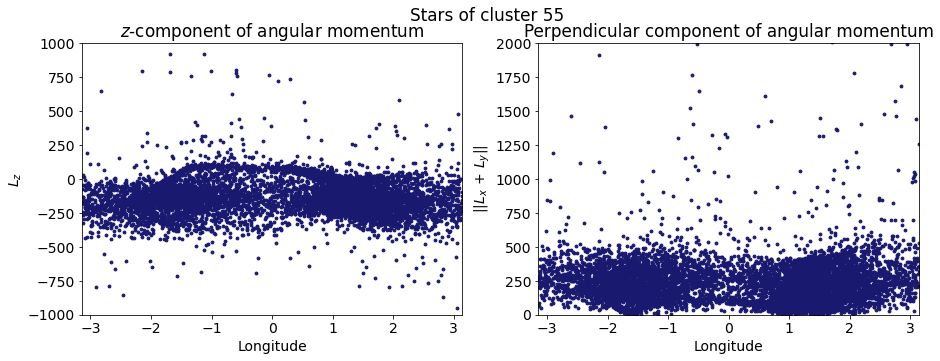

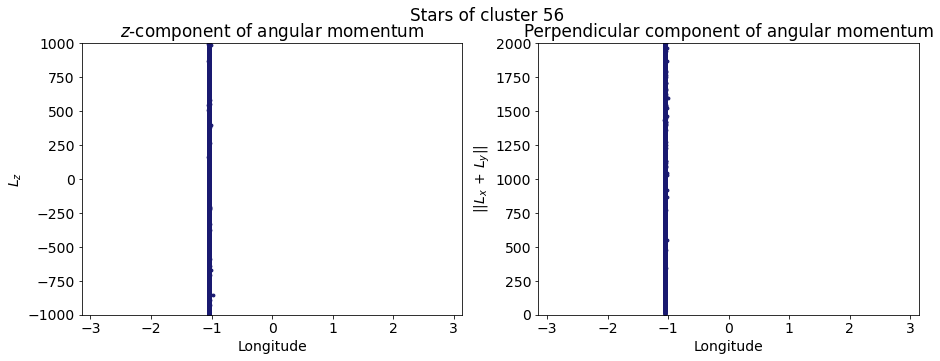

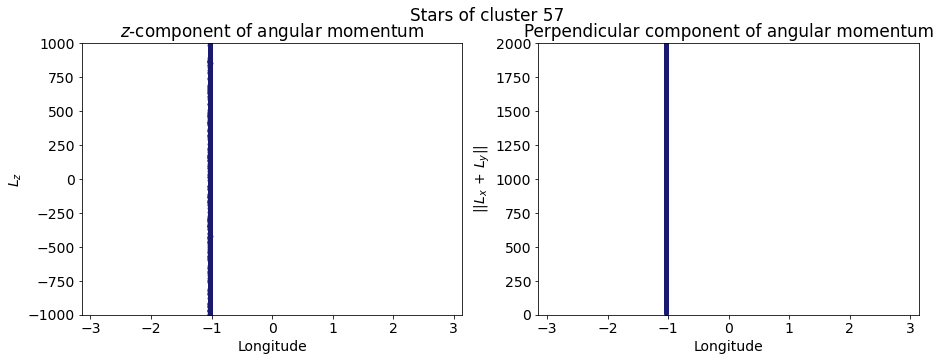

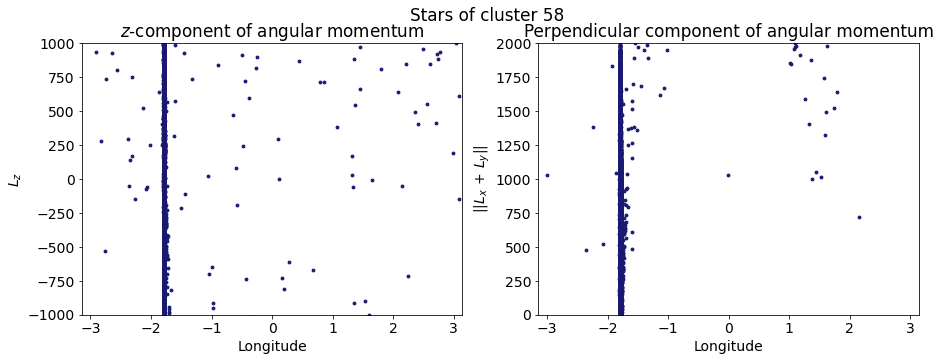

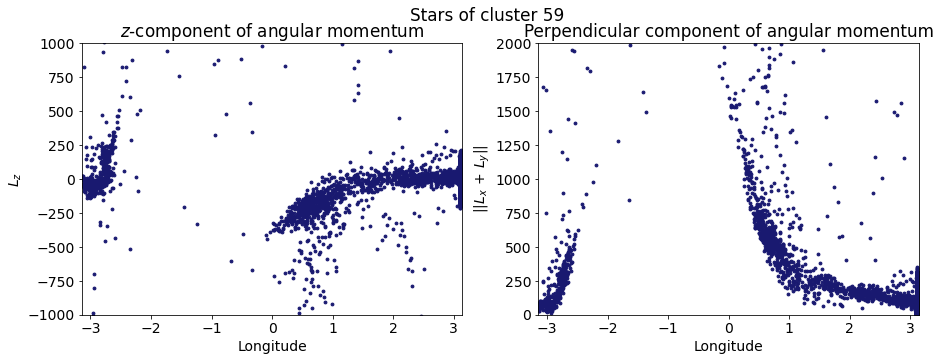

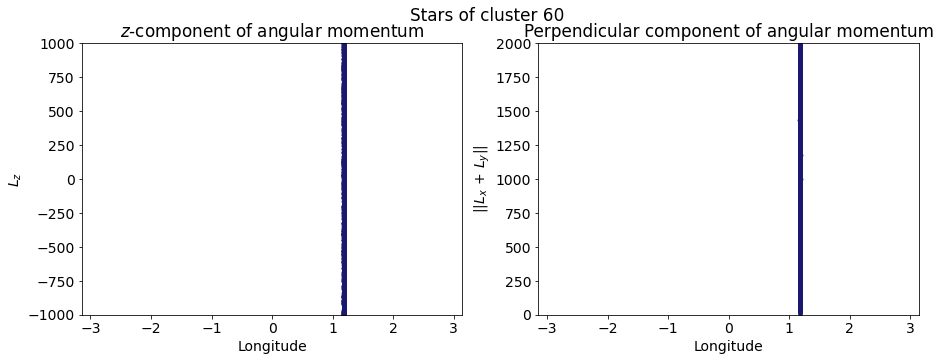

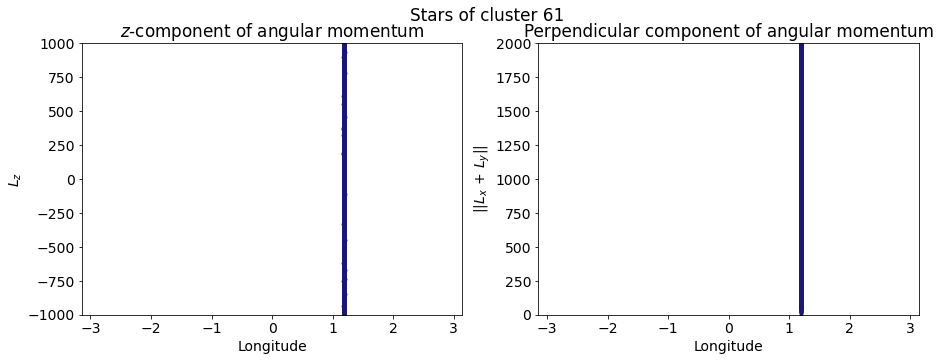

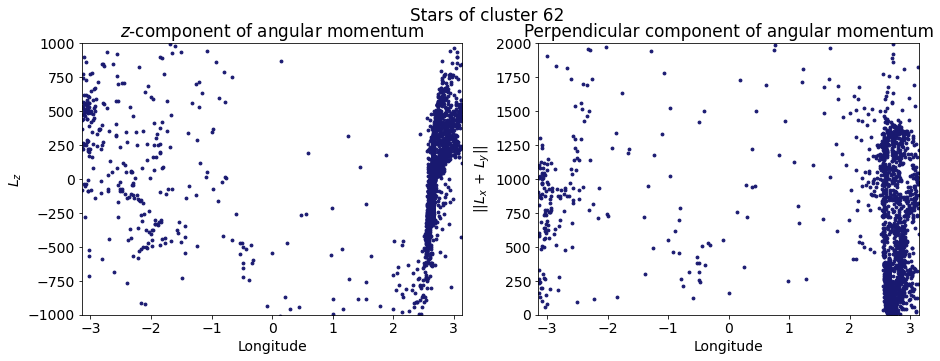

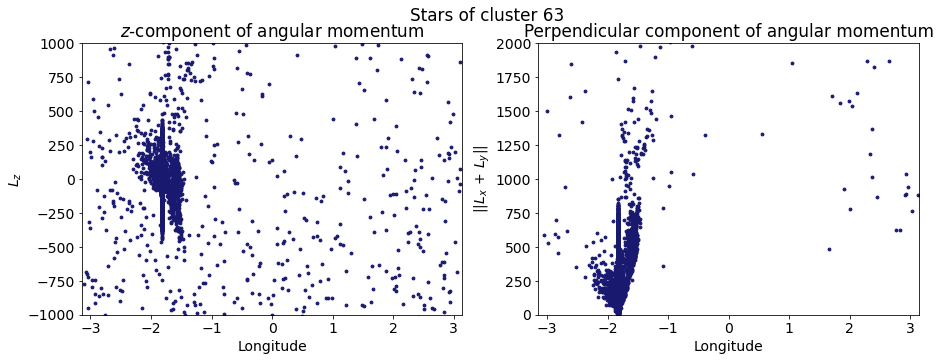

In [15]:
for cluster in range(nc):
    
    select = (ics == cluster)
    
    cluster_x = xc[cluster]
    cluster_y = yc[cluster]
    cluster_z = zc[cluster]
    cluster_r = [cluster_x, cluster_y, cluster_z]

    cluster_vx = vxc[cluster]
    cluster_vy = vyc[cluster]
    cluster_vz = vzc[cluster]
    cluster_v = [cluster_vx, cluster_vy, cluster_vz]

    cluster_L = np.cross(cluster_r, cluster_v)
    cluster_Lx = cluster_L[0]
    cluster_Ly = cluster_L[1]
    cluster_Lz = cluster_L[2]

    stars_x = xs[select]
    stars_y = ys[select]
    stars_z = zs[select]

    stars_vx = vxs[select]
    stars_vy = vys[select]
    stars_vz = vzs[select]

    stars_Lx = []
    stars_Ly = []
    stars_Lz = []

    for i in range(len(stars_x)):

        star_x = stars_x[i]
        star_y = stars_y[i]
        star_z = stars_z[i]
        star_r = [star_x, star_y, star_z]

        star_vx = stars_vx[i]
        star_vy = stars_vy[i]
        star_vz = stars_vz[i]
        star_v = [star_vx, star_vy, star_vz]

        star_L = np.cross(star_r, star_v)

        stars_Lx.append(star_L[0])
        stars_Ly.append(star_L[1])
        stars_Lz.append(star_L[2])

    stars_Lx = np.array(stars_Lx)
    stars_Ly = np.array(stars_Ly)
    stars_Lz = np.array(stars_Lz)

    stars_delta_Lx = stars_Lx - cluster_Lx
    stars_delta_Ly = stars_Ly - cluster_Ly
    stars_delta_Lz = stars_Lz - cluster_Lz

    stars_L_perp = np.sqrt((stars_delta_Lx) ** 2 + (stars_delta_Ly) ** 2)

    stars_longitudes = np.arctan2(stars_y, stars_x)
    
    plt.figure(figsize=(15, 5))
    plt.rc('font', size=14)

    plt.subplot(1,2,2)
    plt.scatter(stars_longitudes, stars_L_perp, s=8, c='midnightblue')

    plt.xlim(-np.pi, np.pi)
    plt.ylim(0,2000)
    plt.xlabel('Longitude')
    plt.ylabel(r'$|| L_x \, + \, L_y ||$')
    plt.title('Perpendicular component of angular momentum')

    plt.subplot(1,2,1)
    plt.scatter(stars_longitudes, stars_delta_Lz, s=8, c='midnightblue')

    plt.xlim(-np.pi, np.pi)
    plt.ylim(-1000,1000)
    plt.xlabel('Longitude')
    plt.ylabel(r'$L_z$')
    plt.title(r'$z$-component of angular momentum')

    plt.suptitle('Stars of cluster ' + str(cluster))
    plt.show()

In [16]:
galpy

ModuleNotFoundError: No module named 'galpy'

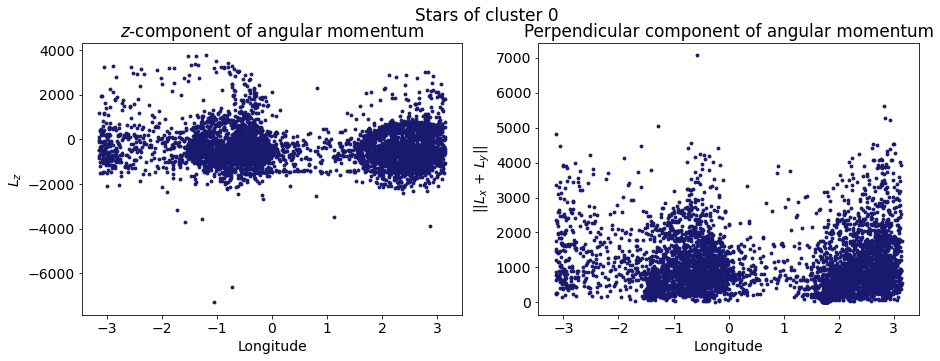

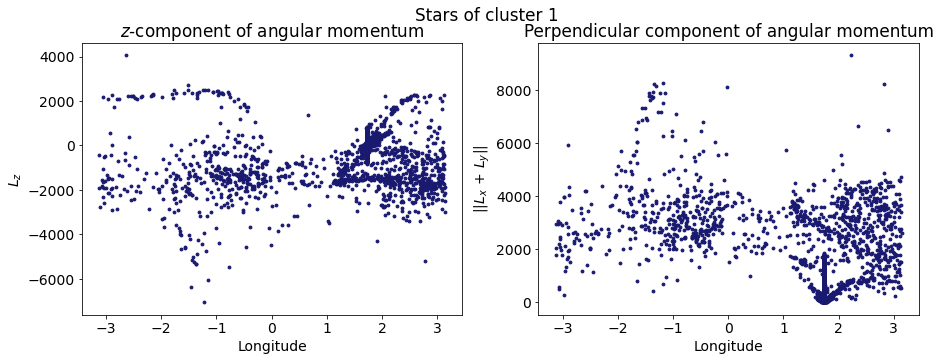

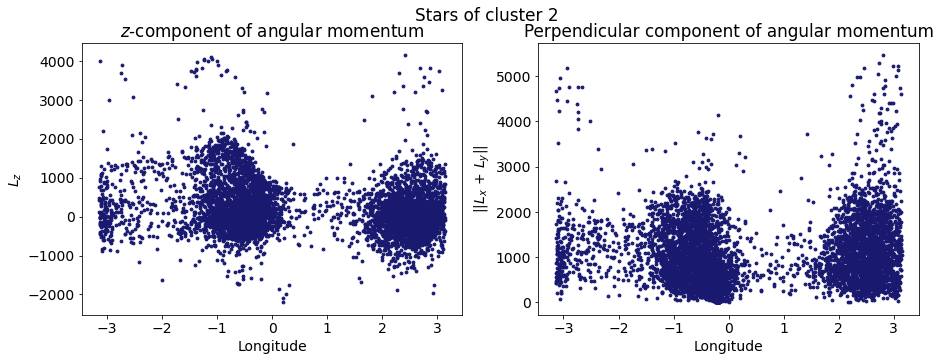

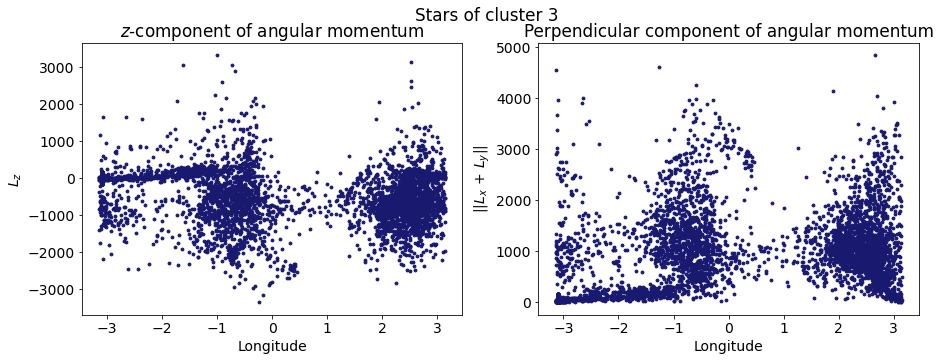

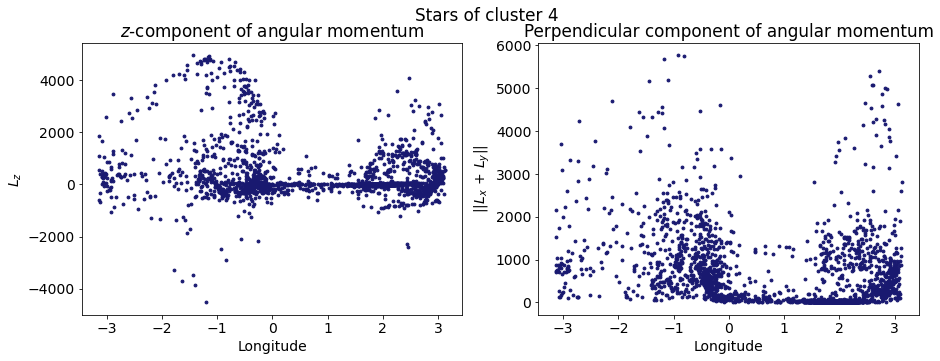

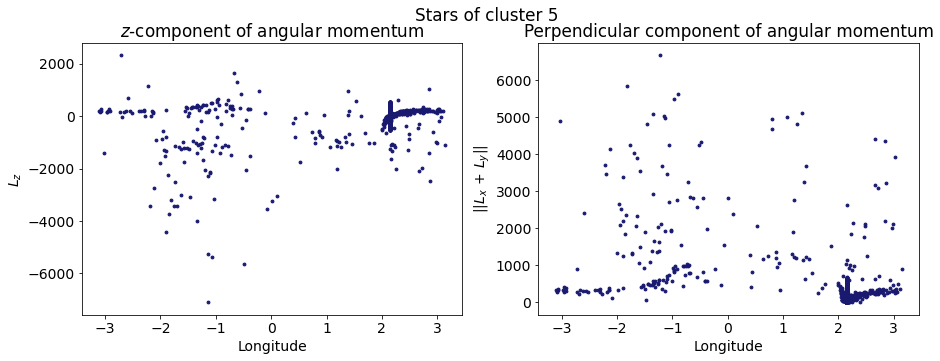

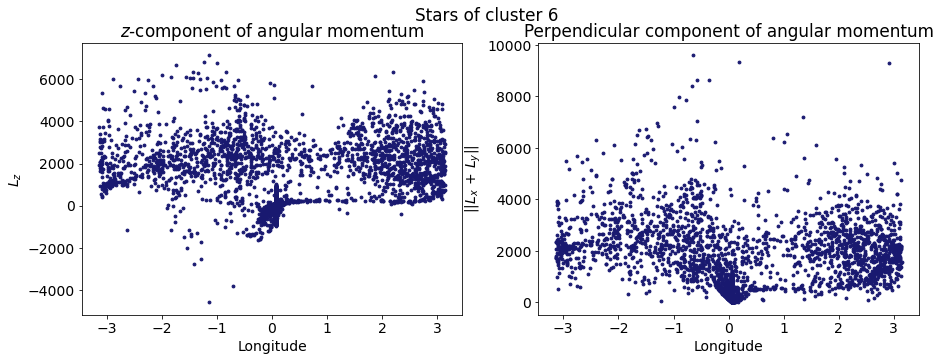

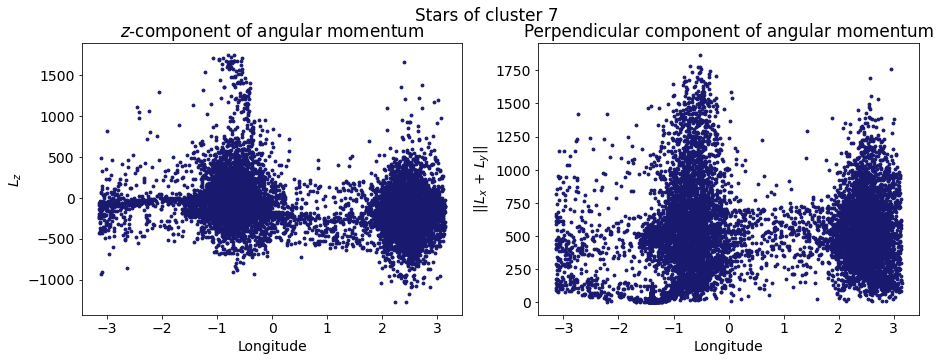

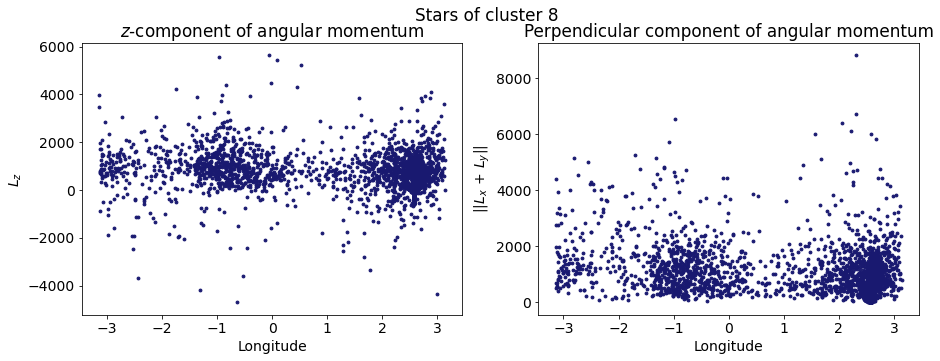

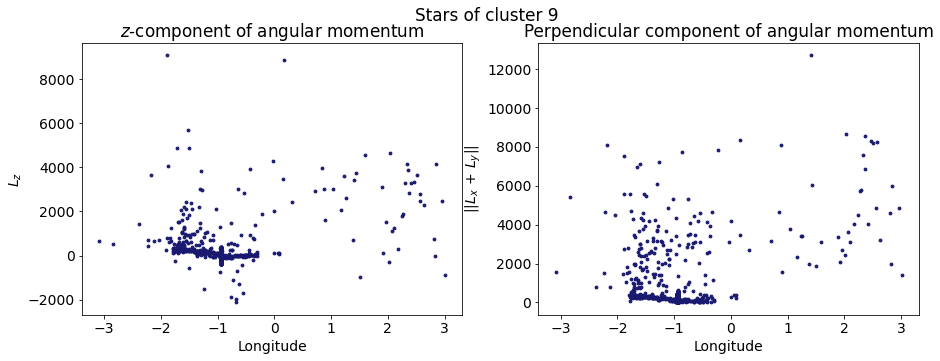

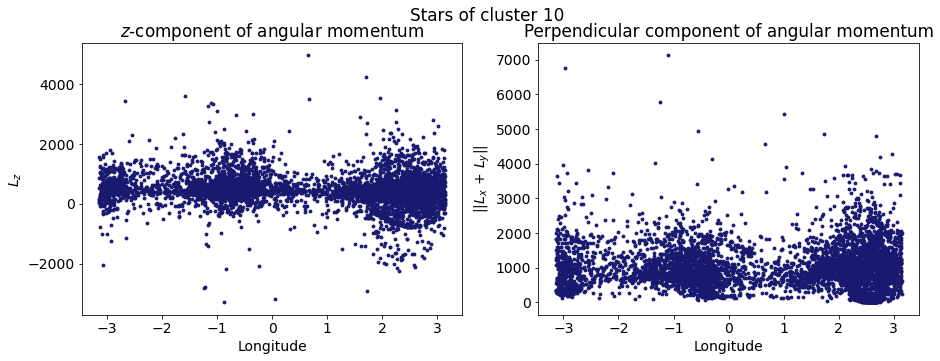

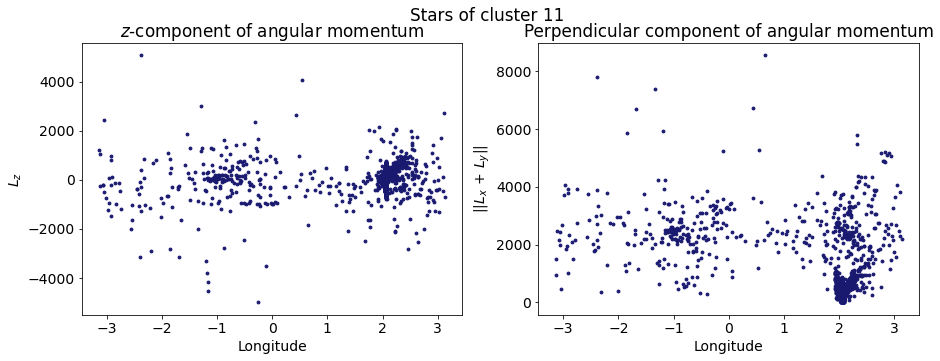

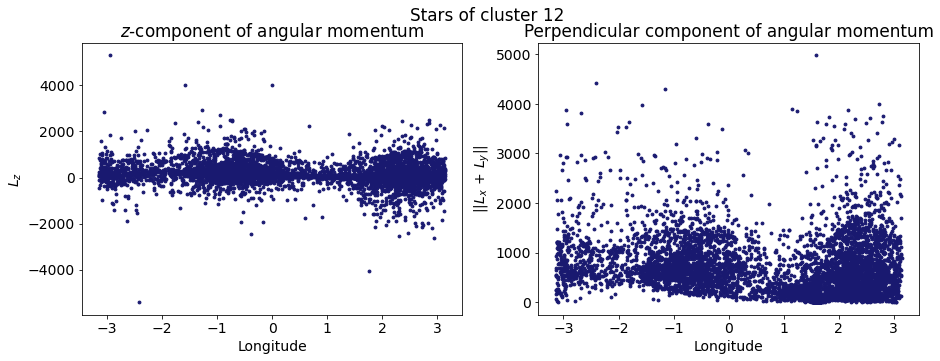

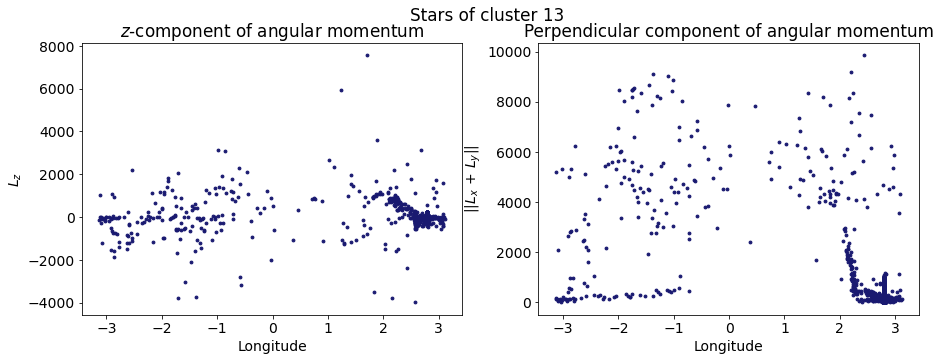

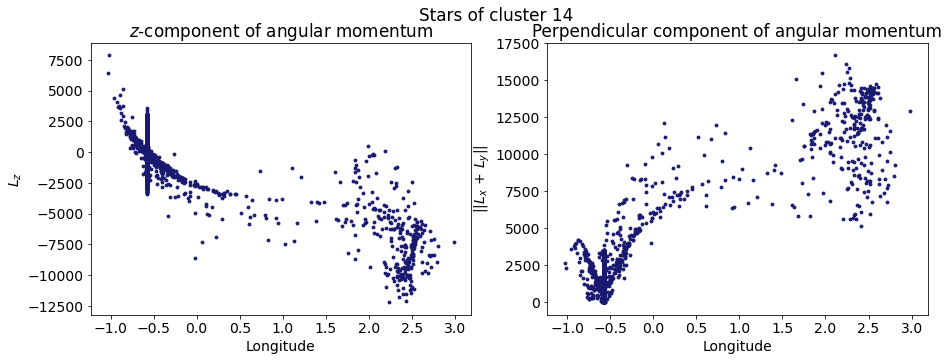

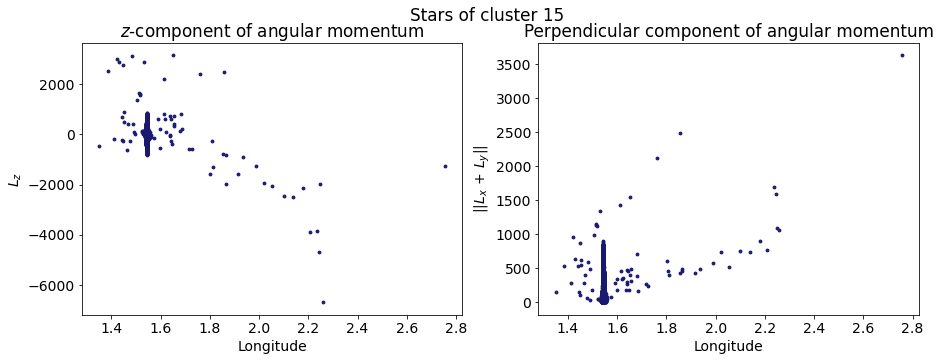

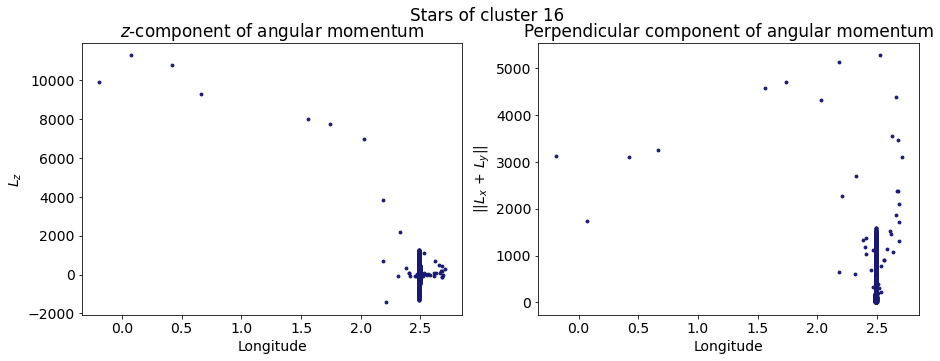

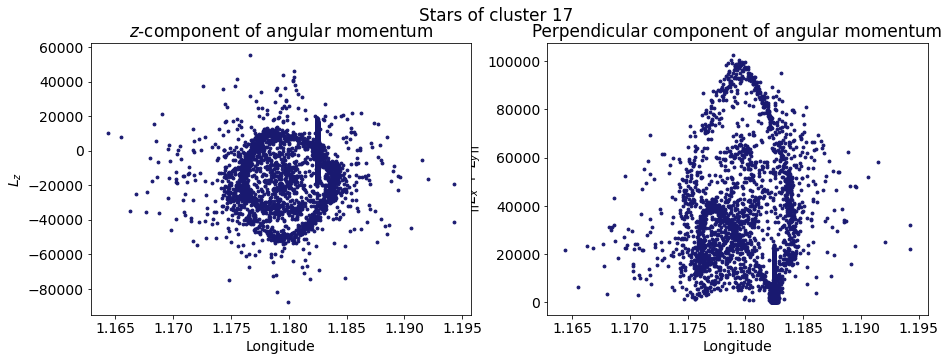

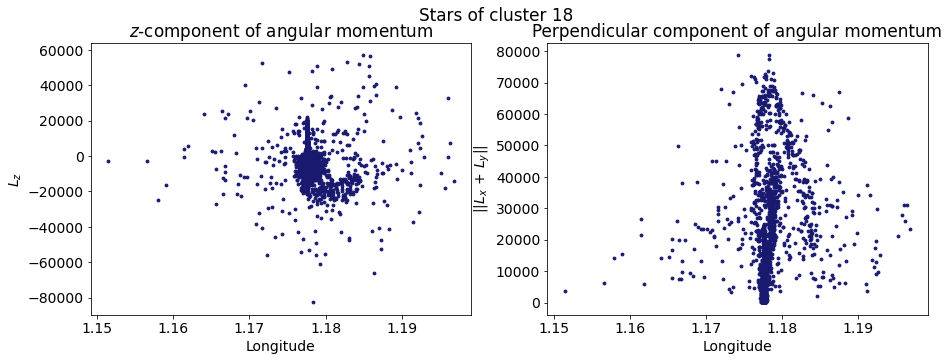

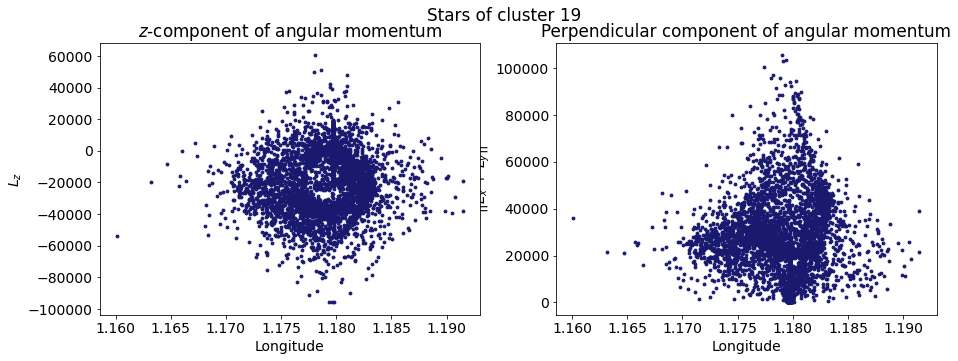

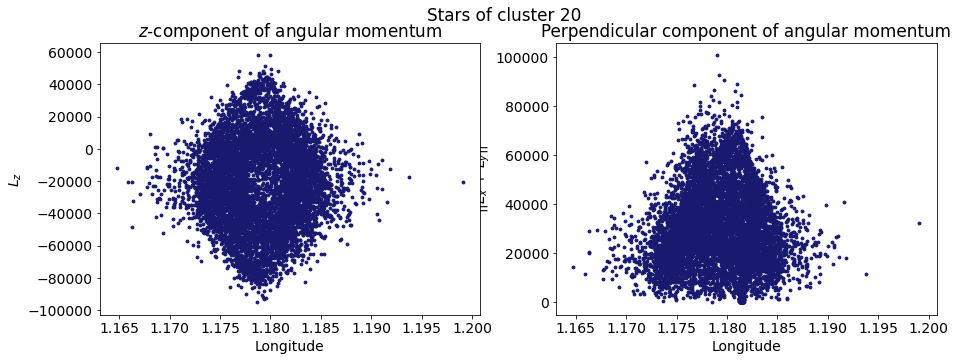

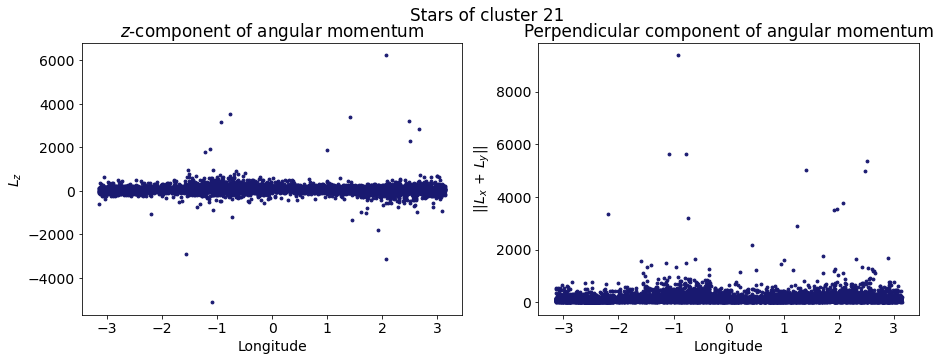

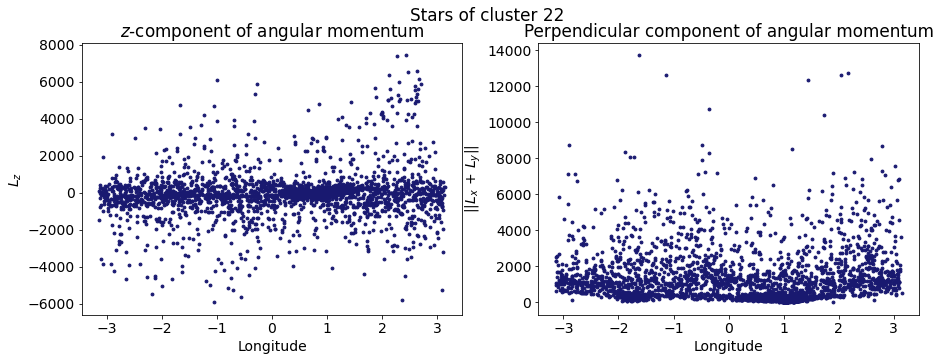

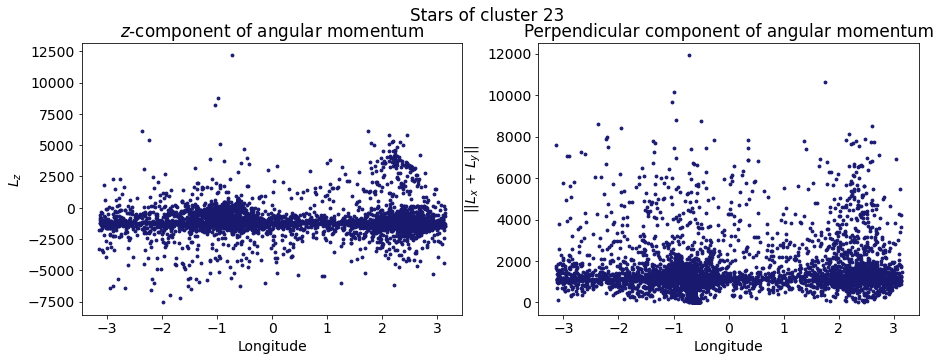

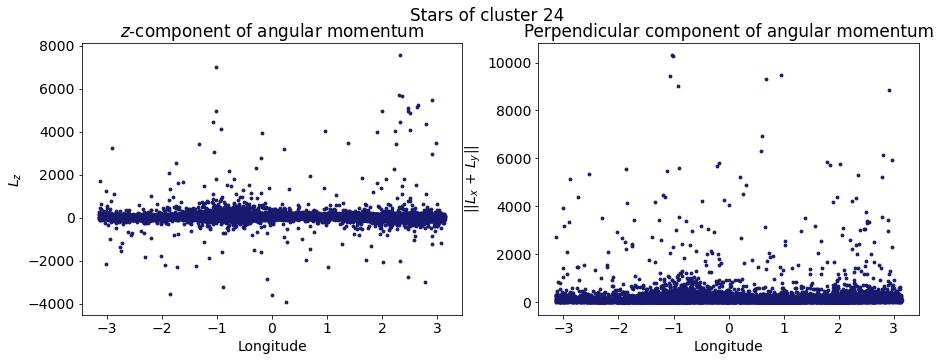

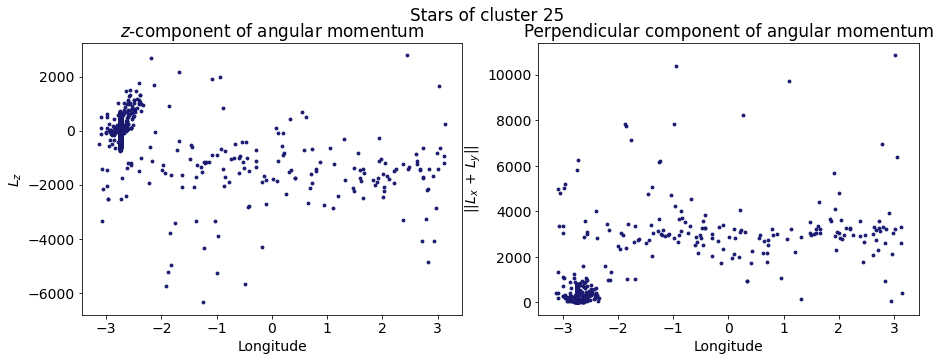

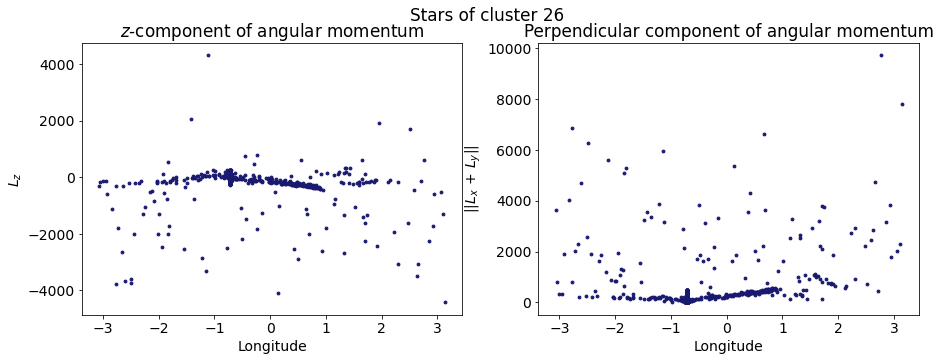

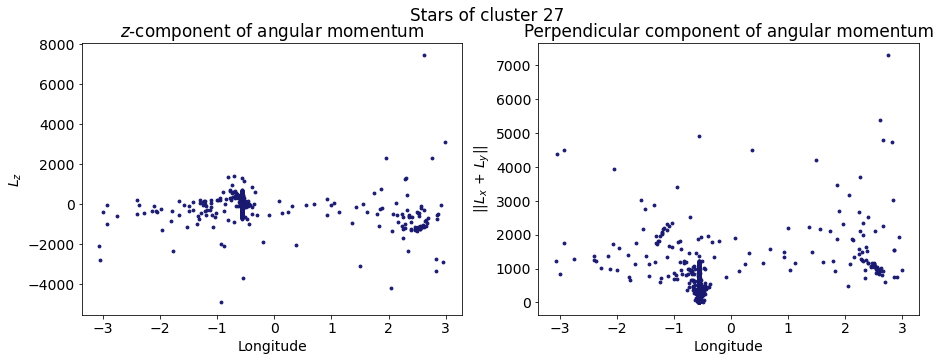

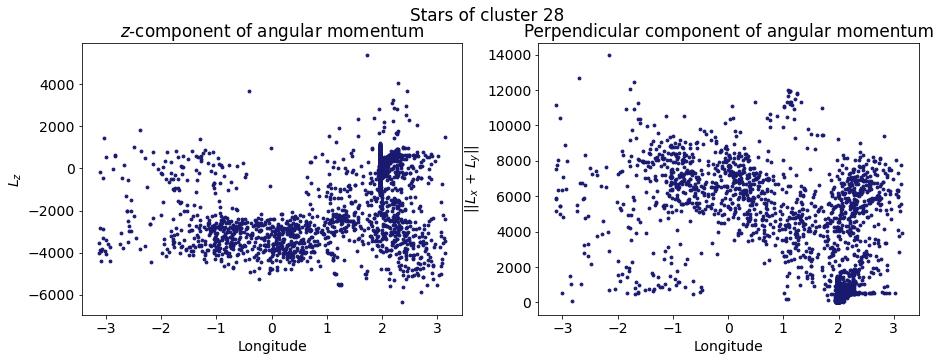

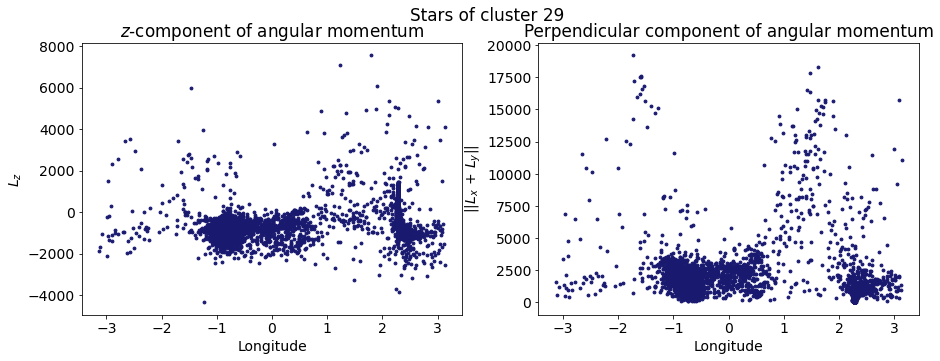

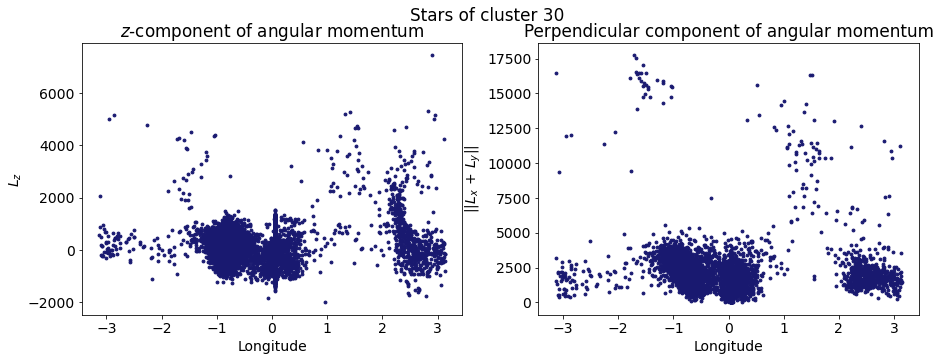

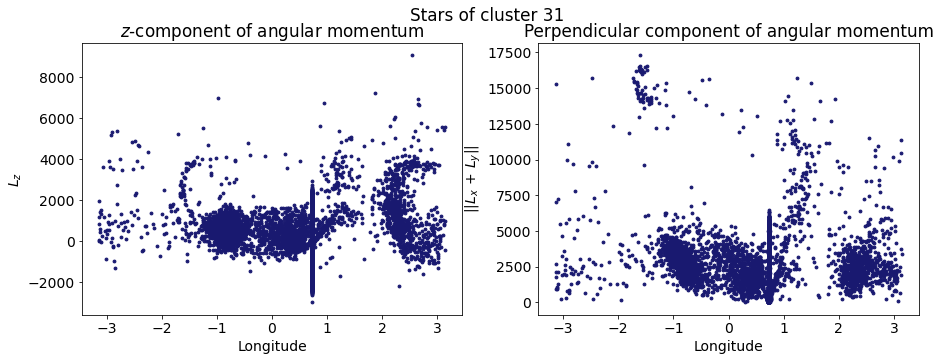

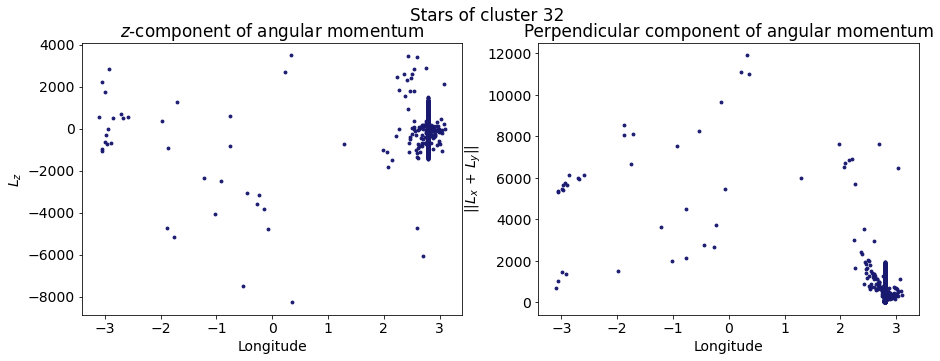

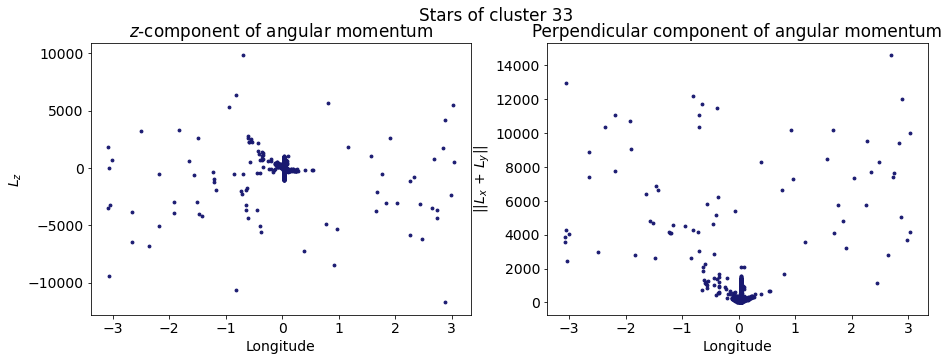

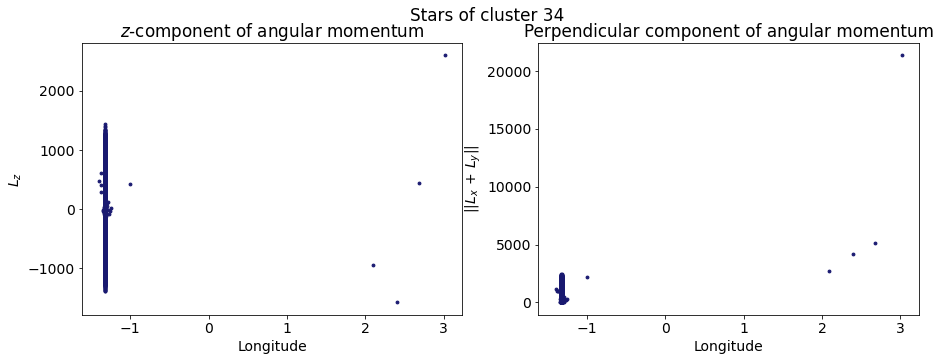

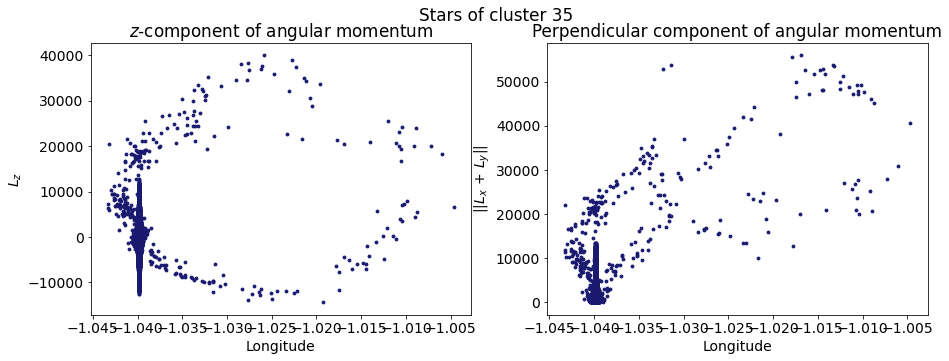

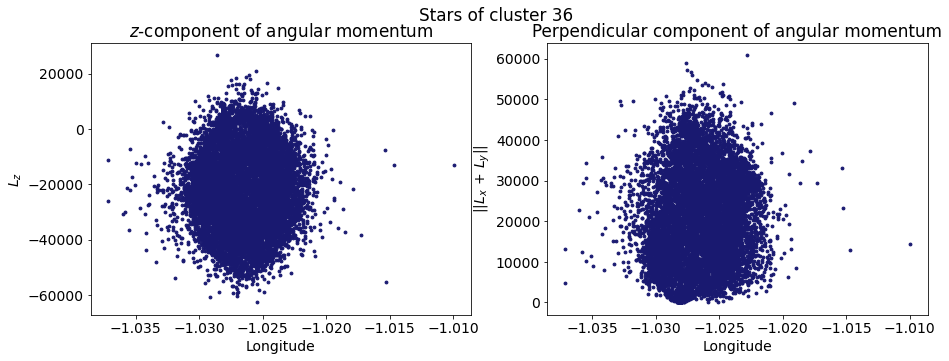

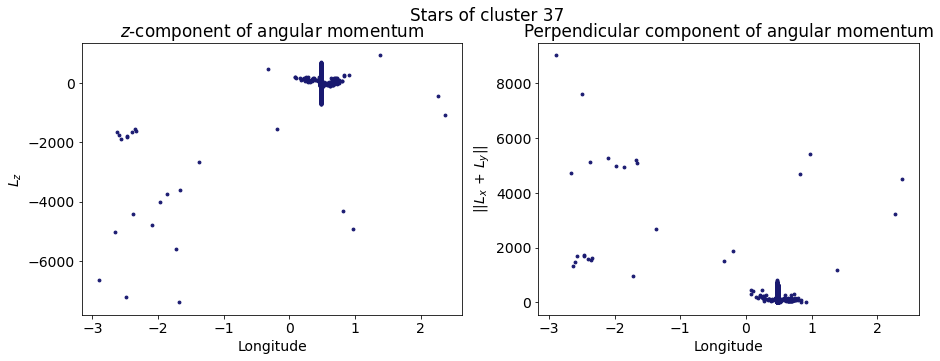

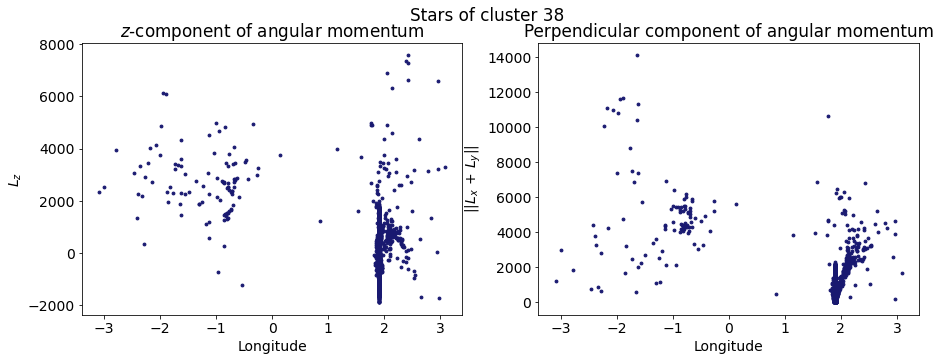

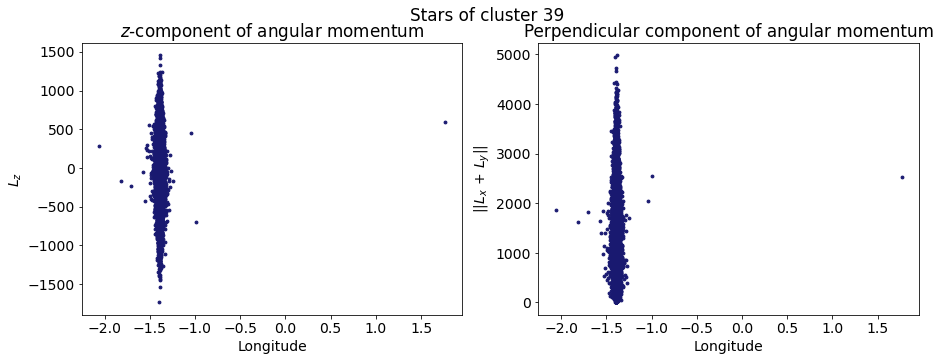

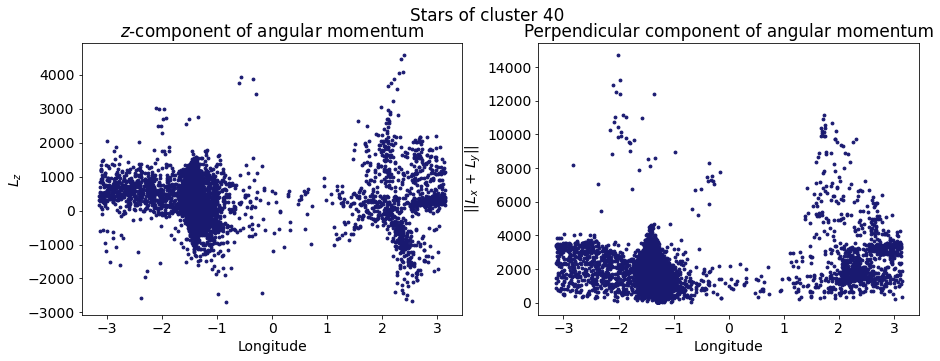

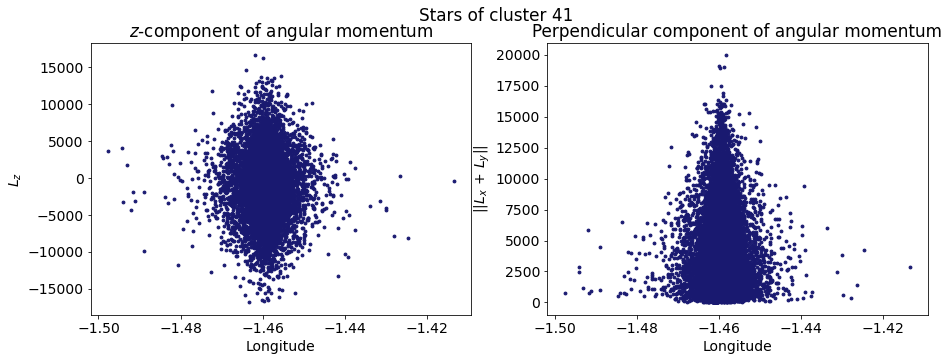

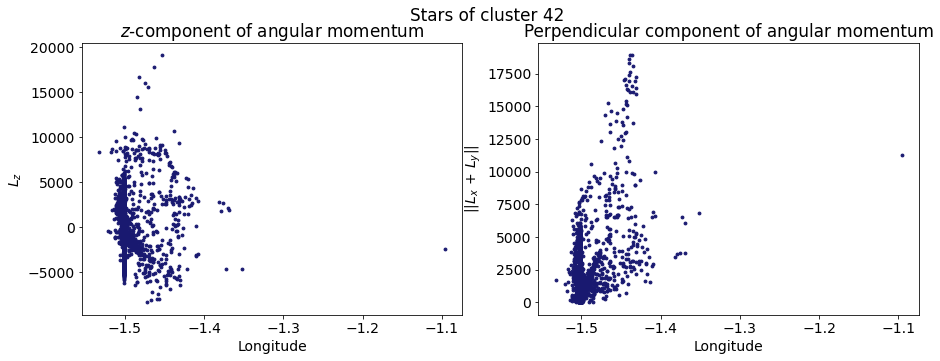

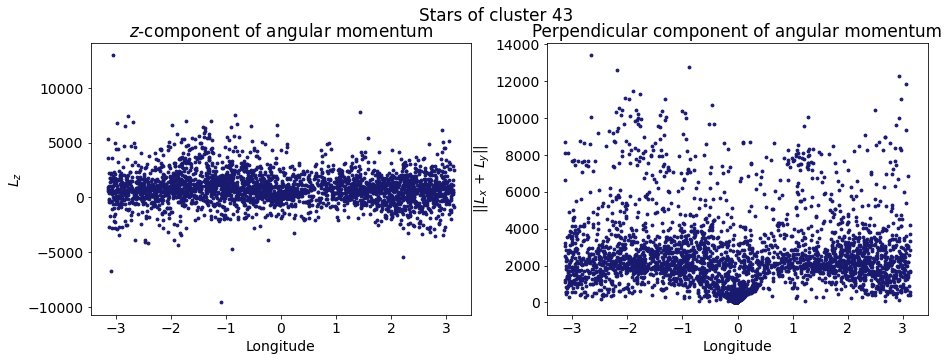

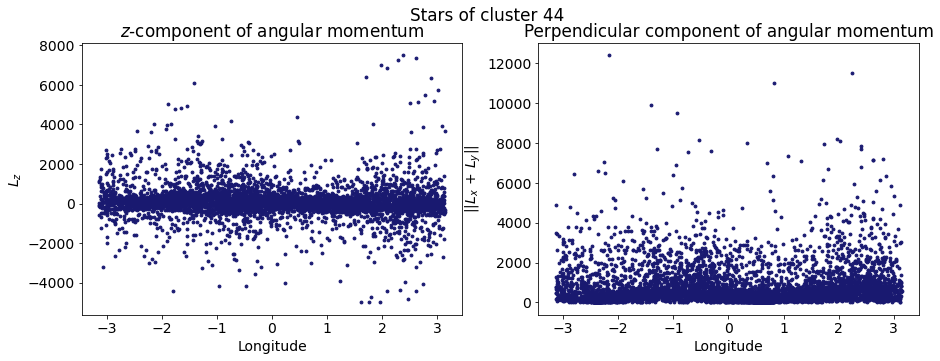

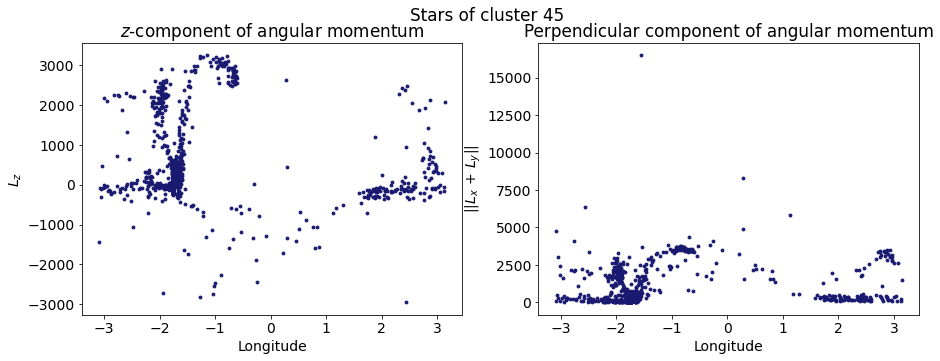

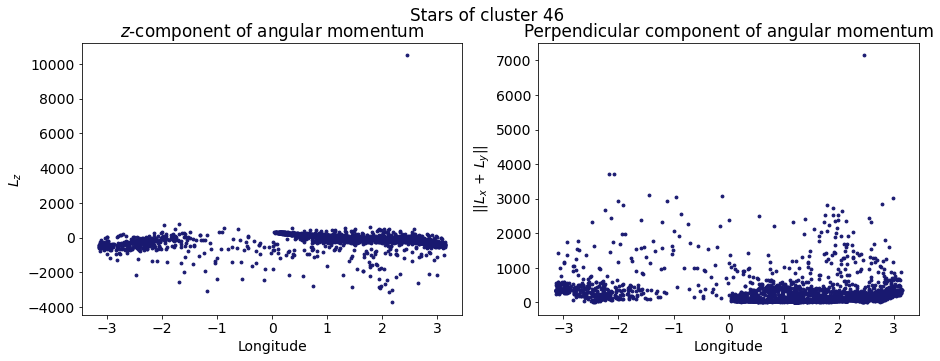

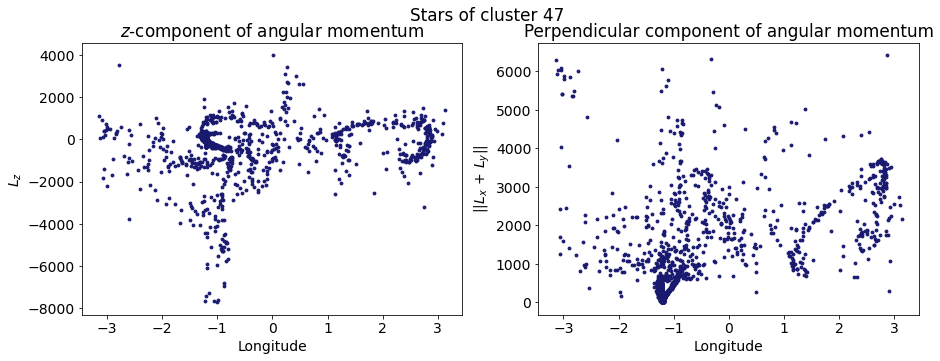

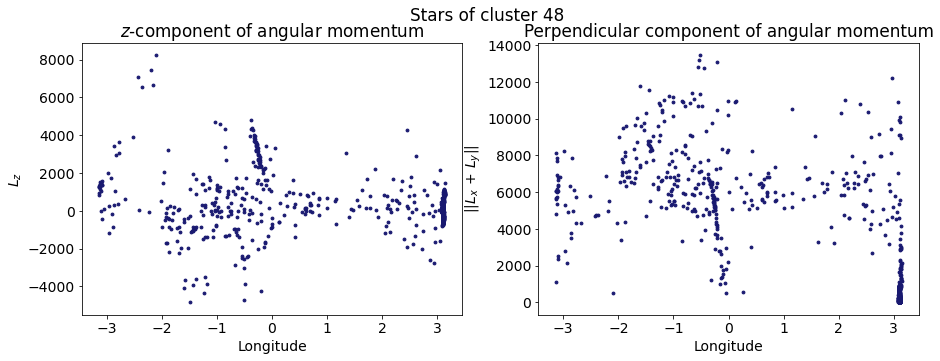

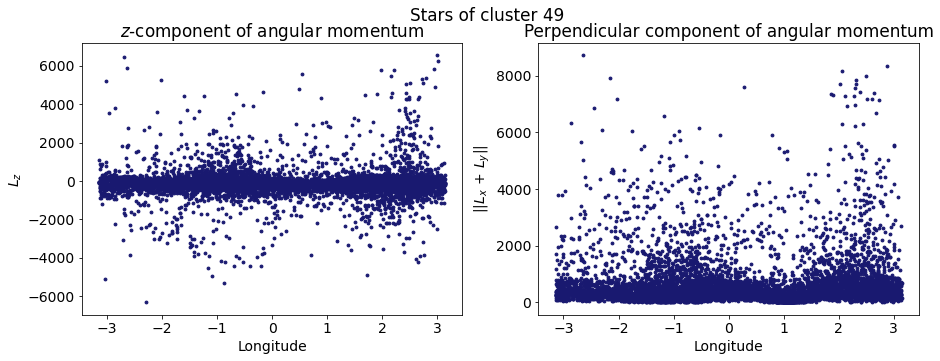

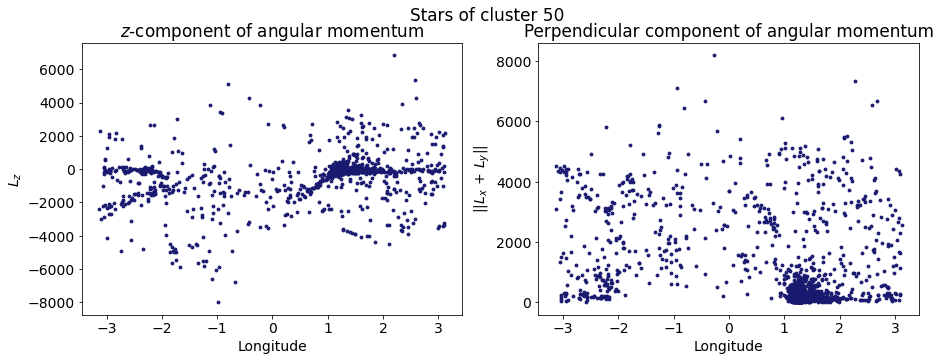

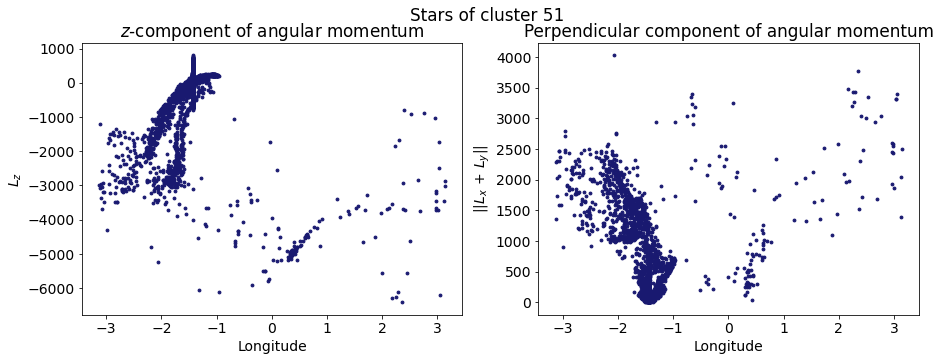

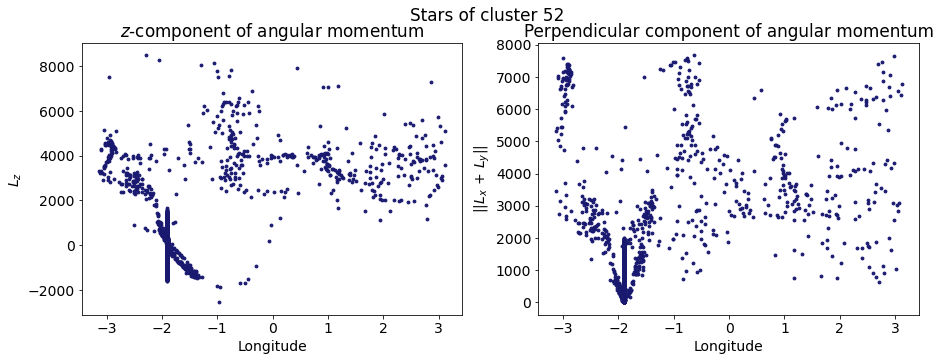

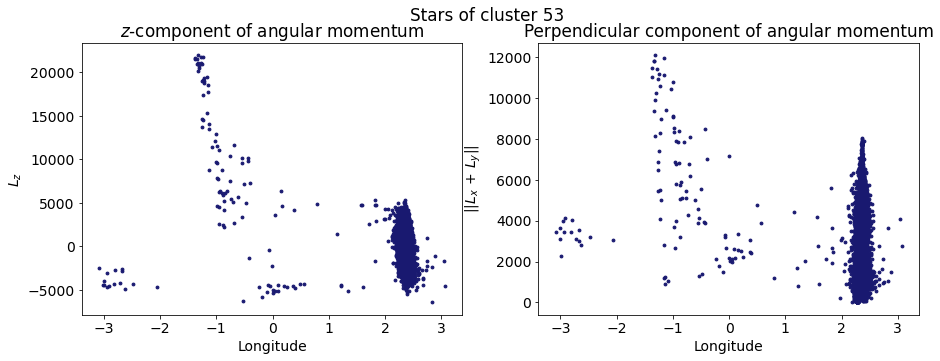

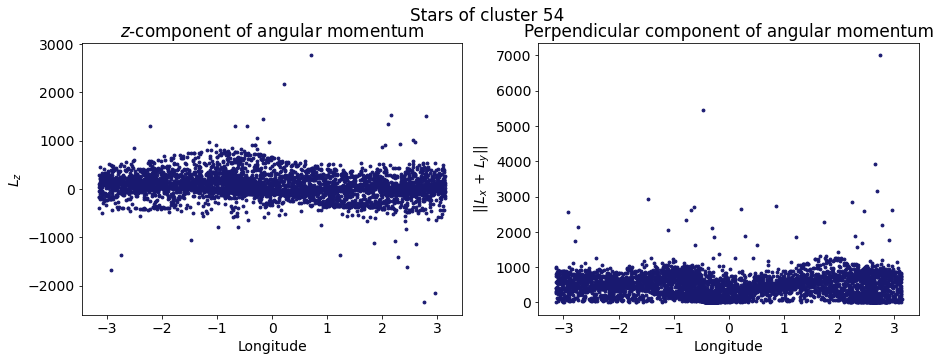

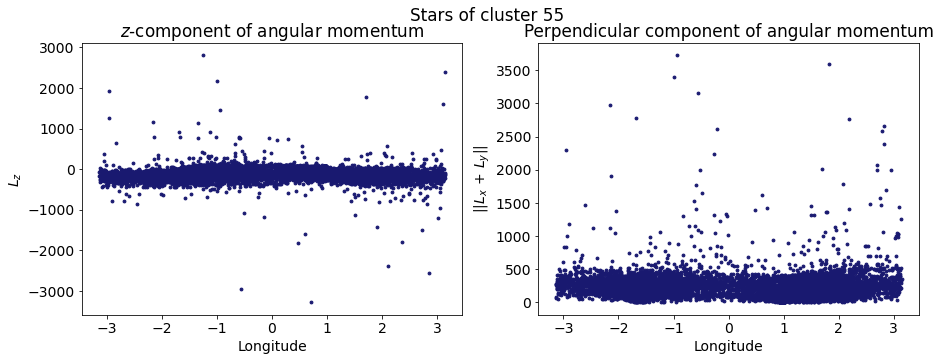

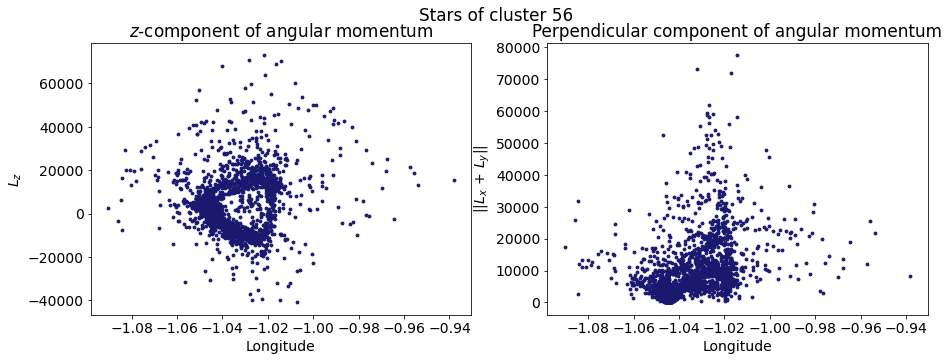

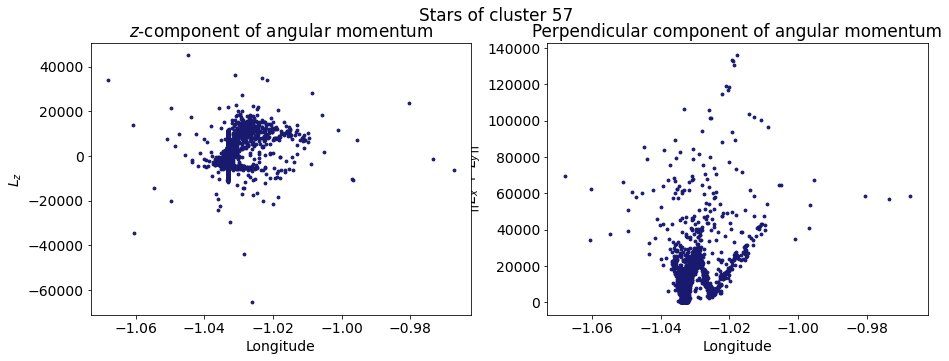

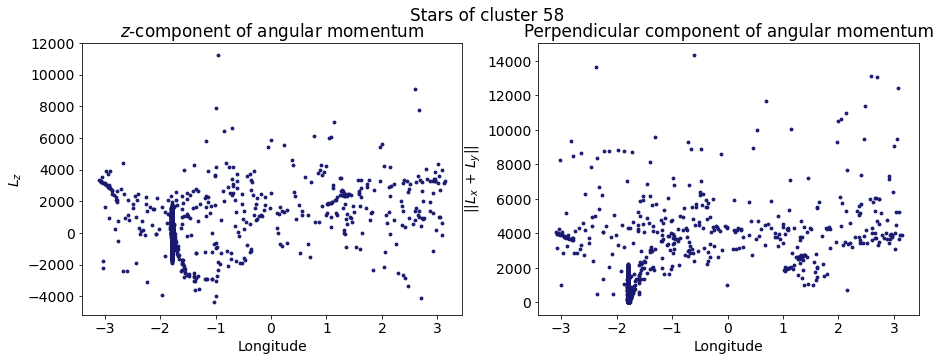

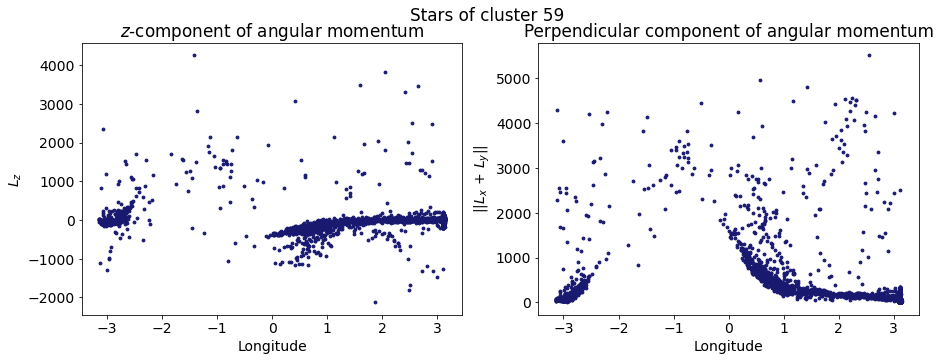

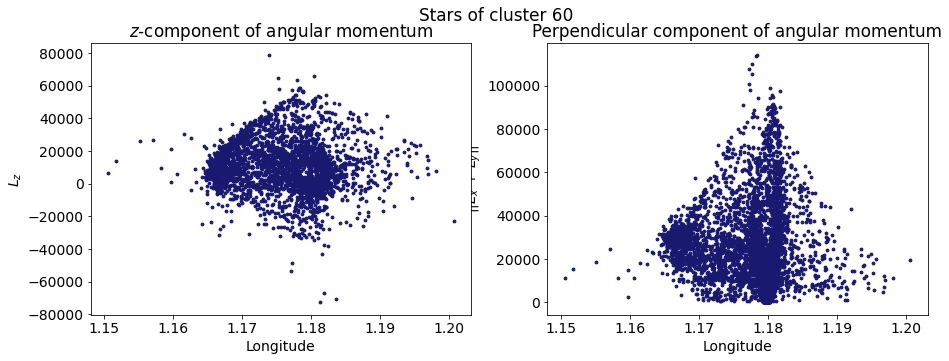

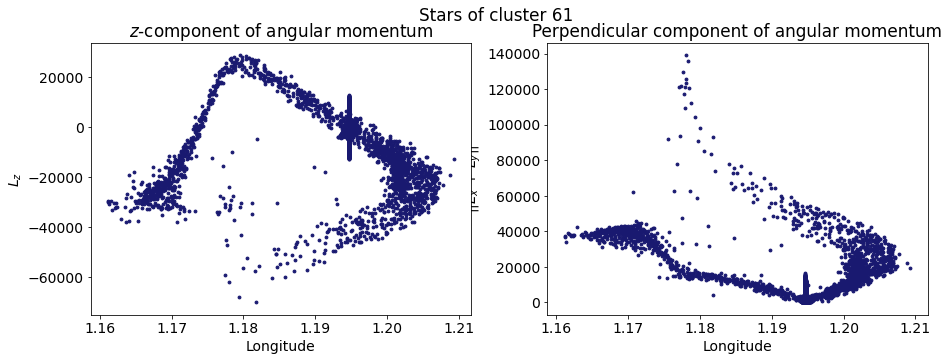

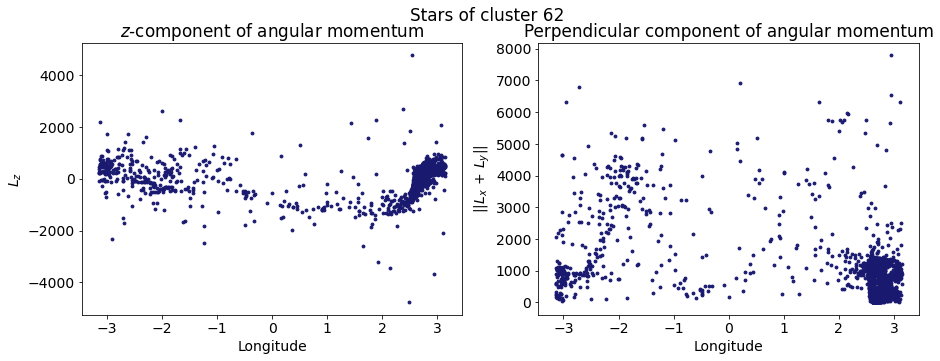

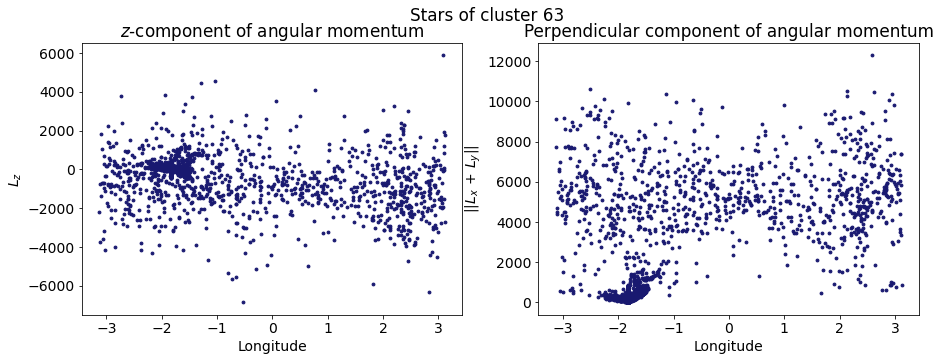

In [48]:
for cluster in range(nc):
    
    select = (ics == cluster)
    
    cluster_x = xc[cluster]
    cluster_y = yc[cluster]
    cluster_z = zc[cluster]
    cluster_r = [cluster_x, cluster_y, cluster_z]

    cluster_vx = vxc[cluster]
    cluster_vy = vyc[cluster]
    cluster_vz = vzc[cluster]
    cluster_v = [cluster_vx, cluster_vy, cluster_vz]

    cluster_L = np.cross(cluster_r, cluster_v)
    cluster_Lx = cluster_L[0]
    cluster_Ly = cluster_L[1]
    cluster_Lz = cluster_L[2]

    stars_x = xs[select]
    stars_y = ys[select]
    stars_z = zs[select]

    stars_vx = vxs[select]
    stars_vy = vys[select]
    stars_vz = vzs[select]

    stars_Lx = []
    stars_Ly = []
    stars_Lz = []

    for i in range(len(stars_x)):

        star_x = stars_x[i]
        star_y = stars_y[i]
        star_z = stars_z[i]
        star_r = [star_x, star_y, star_z]

        star_vx = stars_vx[i]
        star_vy = stars_vy[i]
        star_vz = stars_vz[i]
        star_v = [star_vx, star_vy, star_vz]

        star_L = np.cross(star_r, star_v)

        stars_Lx.append(star_L[0])
        stars_Ly.append(star_L[1])
        stars_Lz.append(star_L[2])

    stars_Lx = np.array(stars_Lx)
    stars_Ly = np.array(stars_Ly)
    stars_Lz = np.array(stars_Lz)

    stars_delta_Lx = stars_Lx - cluster_Lx
    stars_delta_Ly = stars_Ly - cluster_Ly
    stars_delta_Lz = stars_Lz - cluster_Lz

    stars_L_perp = np.sqrt((stars_delta_Lx) ** 2 + (stars_delta_Ly) ** 2)

    stars_longitudes = np.arctan2(stars_y, stars_x)
    
    plt.figure(figsize=(15, 5))
    plt.rc('font', size=14)

    plt.subplot(1,2,2)
    plt.scatter(stars_longitudes, stars_L_perp, s=8, c='midnightblue')

    plt.xlabel('Longitude')
    plt.ylabel(r'$|| L_x \, + \, L_y ||$')
    plt.title('Perpendicular component of angular momentum')

    plt.subplot(1,2,1)
    plt.scatter(stars_longitudes, stars_delta_Lz, s=8, c='midnightblue')

    plt.xlabel('Longitude')
    plt.ylabel(r'$L_z$')
    plt.title(r'$z$-component of angular momentum')

    plt.suptitle('Stars of cluster ' + str(cluster))
    plt.show()